<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTELLIGENT-RAIL" data-toc-modified-id="INTELLIGENT-RAIL-1">INTELLIGENT RAIL</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#A-Capstone-project-by-Edward-Jackson-(Data-Scientist)---Notebook-1-of-2" data-toc-modified-id="A-Capstone-project-by-Edward-Jackson-(Data-Scientist)---Notebook-1-of-2-1.0.1">A Capstone project by Edward Jackson (Data Scientist) - Notebook 1 of 2</a></span></li><li><span><a href="#Finalising-features-and-defining-the-target-variable" data-toc-modified-id="Finalising-features-and-defining-the-target-variable-1.0.2">Finalising features and defining the target variable</a></span></li><li><span><a href="#Trialling-different-scalers" data-toc-modified-id="Trialling-different-scalers-1.0.3">Trialling different scalers</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.0.4">Data preprocessing</a></span></li></ul></li><li><span><a href="#Training-models" data-toc-modified-id="Training-models-1.1">Training models</a></span><ul class="toc-item"><li><span><a href="#Using-logistic-regression" data-toc-modified-id="Using-logistic-regression-1.1.1">Using logistic regression</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1.1.2">Principal Component Analysis</a></span></li><li><span><a href="#Using-Support-Vector-Machines-(SVMs)" data-toc-modified-id="Using-Support-Vector-Machines-(SVMs)-1.1.3">Using Support Vector Machines (SVMs)</a></span><ul class="toc-item"><li><span><a href="#SVM-on-principal-components" data-toc-modified-id="SVM-on-principal-components-1.1.3.1">SVM on principal components</a></span></li></ul></li><li><span><a href="#Using-RandomForestClassifier" data-toc-modified-id="Using-RandomForestClassifier-1.1.4">Using RandomForestClassifier</a></span><ul class="toc-item"><li><span><a href="#RF-on-principal-components" data-toc-modified-id="RF-on-principal-components-1.1.4.1">RF on principal components</a></span></li></ul></li><li><span><a href="#Using-XG-Boost" data-toc-modified-id="Using-XG-Boost-1.1.5">Using XG Boost</a></span><ul class="toc-item"><li><span><a href="#XGB-on-principal-components" data-toc-modified-id="XGB-on-principal-components-1.1.5.1">XGB on principal components</a></span></li></ul></li><li><span><a href="#Using-a-Keras-convolutional-neural-network-(CNN)" data-toc-modified-id="Using-a-Keras-convolutional-neural-network-(CNN)-1.1.6">Using a Keras convolutional neural network (CNN)</a></span><ul class="toc-item"><li><span><a href="#ConvNet-on-principal-components" data-toc-modified-id="ConvNet-on-principal-components-1.1.6.1">ConvNet on principal components</a></span></li></ul></li></ul></li><li><span><a href="#Insights-from-log-odds-coefficients" data-toc-modified-id="Insights-from-log-odds-coefficients-1.2">Insights from log-odds coefficients</a></span><ul class="toc-item"><li><span><a href="#Increasing-and-reducing-the-odds-of-breaching-the-delay-threshold" data-toc-modified-id="Increasing-and-reducing-the-odds-of-breaching-the-delay-threshold-1.2.1">Increasing and reducing the odds of breaching the delay threshold</a></span></li></ul></li></ul></li></ul></div>

# INTELLIGENT RAIL

### A Capstone project by Edward Jackson (Data Scientist) - Notebook 1 of 2

##### April 2021

In [ ]:
import pandas as pd
pd.options.display.max_columns = None

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

import time

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

import pickle

First, we import our preprocessed data:

In [154]:
data = pd.read_csv('data/data_final.csv')

In [155]:
data.head()

,year,month,avg_time_mins,expected_journeys,num_cancellations,delayed_departures,avg_delay_departure_all_trains_mins,delayed_arrivals,avg_delay_arrival_all_trains_mins,num_late_trains_15,num_late_trains_30,num_late_trains_60,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Auvergne-Rhône-Alpes,Île-de-France,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,lg_429,lg_431,lg_441,lg_450,lg_468,lg_470,lg_5,lg_515,lg_538,lg_566,lg_640,lg_677,lg_70,lg_750,lg_752,lg_752100,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction,dep__AIX EN PROVENCE TGV,dep__ANGERS SAINT LAUD,dep__ANGOULEME,dep__ANNECY,dep__ARRAS,dep__AVIGNON TGV,dep__BELLEGARDE (AIN),dep__BESANCON FRANCHE COMTE TGV,dep__BORDEAUX ST JEAN,dep__BREST,dep__CHAMBERY CHALLES LES EAUX,dep__DIJON VILLE,dep__DOUAI,dep__DUNKERQUE,dep__GRENOBLE,dep__LA ROCHELLE VILLE,dep__LAVAL,dep__LE CREUSOT MONTCEAU MONTCHANIN,dep__LE MANS,dep__LILLE,dep__LYON PART DIEU,dep__MACON LOCHE,dep__MARNE LA VALLEE,dep__MARSEILLE ST CHARLES,dep__METZ,dep__MONTPELLIER,dep__MULHOUSE VILLE,dep__NANCY,dep__NANTES,dep__NICE VILLE,dep__NIMES,dep__PARIS EST,dep__PARIS LYON,dep__PARIS MONTPARNASSE,dep__PARIS NORD,dep__PARIS VAUGIRARD,dep__PERPIGNAN,dep__POITIERS,dep__QUIMPER,dep__REIMS,dep__RENNES,dep__SAINT ETIENNE CHATEAUCREUX,dep__ST MALO,dep__ST PIERRE DES CORPS,dep__STRASBOURG,dep__TOULON,dep__TOULOUSE MATABIAU,dep__TOURCOING,dep__TOURS,dep__VALENCE ALIXAN TGV,dep__VANNES,arr__AIX EN PROVENCE TGV,arr__ANGERS SAINT LAUD,arr__ANGOULEME,arr__ANNECY,arr__ARRAS,arr__AVIGNON TGV,arr__BELLEGARDE (AIN),arr__BESANCON FRANCHE COMTE TGV,arr__BORDEAUX ST JEAN,arr__BREST,arr__CHAMBERY CHALLES LES EAUX,arr__DIJON VILLE,arr__DOUAI,arr__DUNKERQUE,arr__GRENOBLE,arr__LA ROCHELLE VILLE,arr__LAVAL,arr__LE CREUSOT MONTCEAU MONTCHANIN,arr__LE MANS,arr__LILLE,arr__LYON PART DIEU,arr__MACON LOCHE,arr__MARNE LA VALLEE,arr__MARSEILLE ST CHARLES,arr__METZ,arr__MONTPELLIER,arr__MULHOUSE VILLE,arr__NANCY,arr__NANTES,arr__NICE VILLE,arr__NIMES,arr__PARIS EST,arr__PARIS LYON,arr__PARIS MONTPARNASSE,arr__PARIS NORD,arr__PARIS VAUGIRARD,arr__PERPIGNAN,arr__POITIERS,arr__QUIMPER,arr__REIMS,arr__RENNES,arr__SAINT ETIENNE CHATEAUCREUX,arr__ST MALO,arr__ST PIERRE DES CORPS,arr__STRASBOURG,arr__TOULON,arr__TOULOUSE MATABIAU,arr__TOURCOING,arr__TOURS,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works
0,2019,8,132.545775,289,5,172,1.452230,29,3.957981,17,9,3,31.034483,10.344828,17.241379,24.137931,10.344828,6.896552,390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,8,133.004464,224,0,165,2.325967,26,3.189658,12,1,0,16.666667,25.000000,20.833333,12.500000,8.333333,16.666667,390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,8,132.026030,461,0,292,1.845879,38,4.515980,29,22,9,29.729730,45.945946,10.810811,10.810811,0.000000,2.702703,339,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213.684524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Finalising features and defining the target variable

As we are using monthly aggregated punctuality data in this project, we must consider the proportion of journeys to be delayed before indicating that the route is *over the delay threshold*.

Project research online showed that there is a huge variation in definitions around the world. For example, certificates are provided to passengers to show their employers if a train is delayed by just 5 minutes whereas some trains running 30 minutes in the US are still reported as 'on time'. Much seems to depend on the country, length of route and even whether it suits the network to redefine!

There is no industry standard for the proportion of trains delayed in a month to be considered *over the delay threshold*. However, 10% of services recorded as *delayed arrivals* seems to be a reasonable starting point seems to be most comparable with other countries.

In the future, it might also be possible to revert to a *multi-label classification* problem as we do have data on the proportion of services being delayed at key thresholds: 0-15 minutes, 15-30 minutes, 30-60 minutes, over 60 minutes.

In [156]:
# threshold of lateness as a proportion of all journeys
late_indicator = 0.10

We apply this threshold to every row of our dataset, giving target values as follows:
- **1** - proportion of services recorded as *delayed arrivals* AT OR OVER 10% THRESHOLD
- **0** - proportion of services recorded as *delayed arrivals* UNDER 10% THRESHOLD

In [157]:
target = []

for i in range(0, len(data)):
    expected = data.loc[i,'expected_journeys']
    delay = data.loc[i,'delayed_arrivals'] + data.loc[i,'num_cancellations']
    delay_pct = delay/(expected)     # chance of delay for all services known not to be cancelled
    target.append(np.where(delay_pct>=late_indicator, 1, 0))    # threshold here at 10% can be changed
    
data['target']=target

Next, we remove redundant columns:
- **year** - month is most important because it gives an indication of changing conditions e.g. weather
- **num_cancellations**/**delayed_arrivals** - used already to calculate from the delay threshold and likely to have strong multi-collinearity with the target
- **num_late_trains_15**/**num_late_trains_30**/**num_late_trains_60** - also likely to have multicollinearity with the target but could be used in any future multi-label classification update of this project.

In [158]:
data = data.drop(columns=['year','num_cancellations','delayed_arrivals','num_late_trains_15','num_late_trains_30','num_late_trains_60'])

In [159]:
data.head()

,month,avg_time_mins,expected_journeys,delayed_departures,avg_delay_departure_all_trains_mins,avg_delay_arrival_all_trains_mins,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Auvergne-Rhône-Alpes,Île-de-France,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,lg_429,lg_431,lg_441,lg_450,lg_468,lg_470,lg_5,lg_515,lg_538,lg_566,lg_640,lg_677,lg_70,lg_750,lg_752,lg_752100,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction,dep__AIX EN PROVENCE TGV,dep__ANGERS SAINT LAUD,dep__ANGOULEME,dep__ANNECY,dep__ARRAS,dep__AVIGNON TGV,dep__BELLEGARDE (AIN),dep__BESANCON FRANCHE COMTE TGV,dep__BORDEAUX ST JEAN,dep__BREST,dep__CHAMBERY CHALLES LES EAUX,dep__DIJON VILLE,dep__DOUAI,dep__DUNKERQUE,dep__GRENOBLE,dep__LA ROCHELLE VILLE,dep__LAVAL,dep__LE CREUSOT MONTCEAU MONTCHANIN,dep__LE MANS,dep__LILLE,dep__LYON PART DIEU,dep__MACON LOCHE,dep__MARNE LA VALLEE,dep__MARSEILLE ST CHARLES,dep__METZ,dep__MONTPELLIER,dep__MULHOUSE VILLE,dep__NANCY,dep__NANTES,dep__NICE VILLE,dep__NIMES,dep__PARIS EST,dep__PARIS LYON,dep__PARIS MONTPARNASSE,dep__PARIS NORD,dep__PARIS VAUGIRARD,dep__PERPIGNAN,dep__POITIERS,dep__QUIMPER,dep__REIMS,dep__RENNES,dep__SAINT ETIENNE CHATEAUCREUX,dep__ST MALO,dep__ST PIERRE DES CORPS,dep__STRASBOURG,dep__TOULON,dep__TOULOUSE MATABIAU,dep__TOURCOING,dep__TOURS,dep__VALENCE ALIXAN TGV,dep__VANNES,arr__AIX EN PROVENCE TGV,arr__ANGERS SAINT LAUD,arr__ANGOULEME,arr__ANNECY,arr__ARRAS,arr__AVIGNON TGV,arr__BELLEGARDE (AIN),arr__BESANCON FRANCHE COMTE TGV,arr__BORDEAUX ST JEAN,arr__BREST,arr__CHAMBERY CHALLES LES EAUX,arr__DIJON VILLE,arr__DOUAI,arr__DUNKERQUE,arr__GRENOBLE,arr__LA ROCHELLE VILLE,arr__LAVAL,arr__LE CREUSOT MONTCEAU MONTCHANIN,arr__LE MANS,arr__LILLE,arr__LYON PART DIEU,arr__MACON LOCHE,arr__MARNE LA VALLEE,arr__MARSEILLE ST CHARLES,arr__METZ,arr__MONTPELLIER,arr__MULHOUSE VILLE,arr__NANCY,arr__NANTES,arr__NICE VILLE,arr__NIMES,arr__PARIS EST,arr__PARIS LYON,arr__PARIS MONTPARNASSE,arr__PARIS NORD,arr__PARIS VAUGIRARD,arr__PERPIGNAN,arr__POITIERS,arr__QUIMPER,arr__REIMS,arr__RENNES,arr__SAINT ETIENNE CHATEAUCREUX,arr__ST MALO,arr__ST PIERRE DES CORPS,arr__STRASBOURG,arr__TOULON,arr__TOULOUSE MATABIAU,arr__TOURCOING,arr__TOURS,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works,target
0,8,132.545775,289,172,1.452230,3.957981,31.034483,10.344828,17.241379,24.137931,10.344828,6.896552,390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,8,133.004464,224,165,2.325967,3.189658,16.666667,25.000000,20.833333,12.500000,8.333333,16.666667,390,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,247.777778,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,8,132.026030,461,292,1.845879,4.515980,29.729730,45.945946,10.810811,10.810811,0.000000,2.702703,339,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213.684524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Our finalised dataset is comprised if features as follows:

<img src="logistics_data.png">
<img src="maintenance_data.png">
<img src="geodata.png">


In [160]:
data.shape

(6563, 177)

In [161]:
data.isna().sum().sum()

0

In [162]:
data.shape[0]*data.shape[1]

1161651

Although Exploratory Data Analysis has already been conducted in other notebooks in this project, we can summarise our finalised dataset as follows:
- 6,563 rows of data across 177 columns (176 features, 1 target variable)
- Nearly 1.2 million data points
- No missing values

In [163]:
print('Number of routes within delay threshold: ',len(data[data['target']==0]))
print('Number of routes over delay threshold: ',len(data[data['target']==1]))

Number of routes within delay threshold:  1841
Number of routes over delay threshold:  4722


We see that there is a class imbalance here. Given the size of the dataset, we choose to augment rather than reduce. Therefore, *class 0* will be upsampled to match the number of *class 1* rows.

In [164]:
data_ontime = data[data['target']==0]
data_delay = data[data['target']==1]

In [165]:
# number of samples required to even up the classes
n_samples = len(data_delay)

data_ontime_upsample = resample(data_ontime,
                                 replace=True,
                                 n_samples=n_samples,
                                 random_state=42)

# join the above and below threshold data into one
data_upsampled = pd.concat([data_ontime_upsample, data_delay])

In [166]:
# set target data type
data_upsampled['target'] = data_upsampled['target'].astype('int')

In [167]:
data_upsampled.shape

(9444, 177)

We see that we now have 9,444 rows of data across 177 columns.

 We split the features and target into *X* and *y* subsets in preparation for the modelling process.

In [168]:
X = data_upsampled.drop(columns='target')    # all but target column
y = data_upsampled.loc[:,'target']      # all rows in target column

We will keep ~25% of the dataset aside as a **test set** which will only be used to evaluate each model type once at the end of our project. This is important to prevent models learning from any information leaked from this data i.e. the data will be truly unseen by the models at the point of evaluation. However, it should be noted that the **test set** will undergo exactly the same *preprocessing* steps as the rest of the data e.g. scaling.

In [169]:
# Splitting out ~25% for test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.25,random_state=42, stratify=y)

In [170]:
X_remainder.head()

,month,avg_time_mins,expected_journeys,delayed_departures,avg_delay_departure_all_trains_mins,avg_delay_arrival_all_trains_mins,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Auvergne-Rhône-Alpes,Île-de-France,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,lg_429,lg_431,lg_441,lg_450,lg_468,lg_470,lg_5,lg_515,lg_538,lg_566,lg_640,lg_677,lg_70,lg_750,lg_752,lg_752100,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction,dep__AIX EN PROVENCE TGV,dep__ANGERS SAINT LAUD,dep__ANGOULEME,dep__ANNECY,dep__ARRAS,dep__AVIGNON TGV,dep__BELLEGARDE (AIN),dep__BESANCON FRANCHE COMTE TGV,dep__BORDEAUX ST JEAN,dep__BREST,dep__CHAMBERY CHALLES LES EAUX,dep__DIJON VILLE,dep__DOUAI,dep__DUNKERQUE,dep__GRENOBLE,dep__LA ROCHELLE VILLE,dep__LAVAL,dep__LE CREUSOT MONTCEAU MONTCHANIN,dep__LE MANS,dep__LILLE,dep__LYON PART DIEU,dep__MACON LOCHE,dep__MARNE LA VALLEE,dep__MARSEILLE ST CHARLES,dep__METZ,dep__MONTPELLIER,dep__MULHOUSE VILLE,dep__NANCY,dep__NANTES,dep__NICE VILLE,dep__NIMES,dep__PARIS EST,dep__PARIS LYON,dep__PARIS MONTPARNASSE,dep__PARIS NORD,dep__PARIS VAUGIRARD,dep__PERPIGNAN,dep__POITIERS,dep__QUIMPER,dep__REIMS,dep__RENNES,dep__SAINT ETIENNE CHATEAUCREUX,dep__ST MALO,dep__ST PIERRE DES CORPS,dep__STRASBOURG,dep__TOULON,dep__TOULOUSE MATABIAU,dep__TOURCOING,dep__TOURS,dep__VALENCE ALIXAN TGV,dep__VANNES,arr__AIX EN PROVENCE TGV,arr__ANGERS SAINT LAUD,arr__ANGOULEME,arr__ANNECY,arr__ARRAS,arr__AVIGNON TGV,arr__BELLEGARDE (AIN),arr__BESANCON FRANCHE COMTE TGV,arr__BORDEAUX ST JEAN,arr__BREST,arr__CHAMBERY CHALLES LES EAUX,arr__DIJON VILLE,arr__DOUAI,arr__DUNKERQUE,arr__GRENOBLE,arr__LA ROCHELLE VILLE,arr__LAVAL,arr__LE CREUSOT MONTCEAU MONTCHANIN,arr__LE MANS,arr__LILLE,arr__LYON PART DIEU,arr__MACON LOCHE,arr__MARNE LA VALLEE,arr__MARSEILLE ST CHARLES,arr__METZ,arr__MONTPELLIER,arr__MULHOUSE VILLE,arr__NANCY,arr__NANTES,arr__NICE VILLE,arr__NIMES,arr__PARIS EST,arr__PARIS LYON,arr__PARIS MONTPARNASSE,arr__PARIS NORD,arr__PARIS VAUGIRARD,arr__PERPIGNAN,arr__POITIERS,arr__QUIMPER,arr__REIMS,arr__RENNES,arr__SAINT ETIENNE CHATEAUCREUX,arr__ST MALO,arr__ST PIERRE DES CORPS,arr__STRASBOURG,arr__TOULON,arr__TOULOUSE MATABIAU,arr__TOURCOING,arr__TOURS,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works
4400,5,197.271186,59,1,0.389831,3.661017,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,396,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220.833333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4005,11,121.725083,603,107,3.156146,5.156146,21.212121,38.383838,14.141414,5.050505,15.151515,6.060606,391,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,280.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2143,3,131.106195,566,27,0.722124,2.260177,30.000000,33.333333,13.333333,16.666667,3.333333,3.333333,306,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,262.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

### Trialling different scalers

We must scale our data before modelling to ensure that no feature carries any unfair weight. As we aim to realise the most accurate model, we can trial a range of different scalers. We will scale our *X_remainder* subset and train *vanilla* logistic regression models to give a baseline of performance.

##### MinMaxScaler

In [171]:
minmax = MinMaxScaler()
X_remainder_minmax = minmax.fit_transform(X_remainder)

In [172]:
minmax_X_scaled = pd.DataFrame(X_remainder_minmax, columns=X_remainder.columns)
minmax_X_scaled.head()

,month,avg_time_mins,expected_journeys,delayed_departures,avg_delay_departure_all_trains_mins,avg_delay_arrival_all_trains_mins,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Auvergne-Rhône-Alpes,Île-de-France,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,lg_429,lg_431,lg_441,lg_450,lg_468,lg_470,lg_5,lg_515,lg_538,lg_566,lg_640,lg_677,lg_70,lg_750,lg_752,lg_752100,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction,dep__AIX EN PROVENCE TGV,dep__ANGERS SAINT LAUD,dep__ANGOULEME,dep__ANNECY,dep__ARRAS,dep__AVIGNON TGV,dep__BELLEGARDE (AIN),dep__BESANCON FRANCHE COMTE TGV,dep__BORDEAUX ST JEAN,dep__BREST,dep__CHAMBERY CHALLES LES EAUX,dep__DIJON VILLE,dep__DOUAI,dep__DUNKERQUE,dep__GRENOBLE,dep__LA ROCHELLE VILLE,dep__LAVAL,dep__LE CREUSOT MONTCEAU MONTCHANIN,dep__LE MANS,dep__LILLE,dep__LYON PART DIEU,dep__MACON LOCHE,dep__MARNE LA VALLEE,dep__MARSEILLE ST CHARLES,dep__METZ,dep__MONTPELLIER,dep__MULHOUSE VILLE,dep__NANCY,dep__NANTES,dep__NICE VILLE,dep__NIMES,dep__PARIS EST,dep__PARIS LYON,dep__PARIS MONTPARNASSE,dep__PARIS NORD,dep__PARIS VAUGIRARD,dep__PERPIGNAN,dep__POITIERS,dep__QUIMPER,dep__REIMS,dep__RENNES,dep__SAINT ETIENNE CHATEAUCREUX,dep__ST MALO,dep__ST PIERRE DES CORPS,dep__STRASBOURG,dep__TOULON,dep__TOULOUSE MATABIAU,dep__TOURCOING,dep__TOURS,dep__VALENCE ALIXAN TGV,dep__VANNES,arr__AIX EN PROVENCE TGV,arr__ANGERS SAINT LAUD,arr__ANGOULEME,arr__ANNECY,arr__ARRAS,arr__AVIGNON TGV,arr__BELLEGARDE (AIN),arr__BESANCON FRANCHE COMTE TGV,arr__BORDEAUX ST JEAN,arr__BREST,arr__CHAMBERY CHALLES LES EAUX,arr__DIJON VILLE,arr__DOUAI,arr__DUNKERQUE,arr__GRENOBLE,arr__LA ROCHELLE VILLE,arr__LAVAL,arr__LE CREUSOT MONTCEAU MONTCHANIN,arr__LE MANS,arr__LILLE,arr__LYON PART DIEU,arr__MACON LOCHE,arr__MARNE LA VALLEE,arr__MARSEILLE ST CHARLES,arr__METZ,arr__MONTPELLIER,arr__MULHOUSE VILLE,arr__NANCY,arr__NANTES,arr__NICE VILLE,arr__NIMES,arr__PARIS EST,arr__PARIS LYON,arr__PARIS MONTPARNASSE,arr__PARIS NORD,arr__PARIS VAUGIRARD,arr__PERPIGNAN,arr__POITIERS,arr__QUIMPER,arr__REIMS,arr__RENNES,arr__SAINT ETIENNE CHATEAUCREUX,arr__ST MALO,arr__ST PIERRE DES CORPS,arr__STRASBOURG,arr__TOULON,arr__TOULOUSE MATABIAU,arr__TOURCOING,arr__TOURS,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works
0,0.363636,0.480572,0.057531,0.001692,0.052560,0.405064,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.432398,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.310071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909091,0.240634,0.626569,0.181049,0.090026,0.437347,0.212121,0.383838,0.141414,0.050505,0.151515,0.090909,0.426020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.825702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [173]:
X_tr, X_val, y_tr, y_val = train_test_split(minmax_X_scaled, y_remainder, random_state=42, train_size=0.7, stratify=y_remainder)

In [174]:
min_max_logit = LogisticRegression(C=0.1, verbose=0, random_state=42, n_jobs=-1)
min_max_logit.fit(X_tr, y_tr)
train_accuracy = min_max_logit.score(X_tr, y_tr)
print(f'Training accuracy: {train_accuracy}')
val_accuracy = min_max_logit.score(X_val, y_val)
print(f'Validation accuracy: {val_accuracy}')

Training accuracy: 0.8013311819281969
Validation accuracy: 0.7849411764705883


##### StandardScaler

In [175]:
standard = StandardScaler()
X_remainder_standard = standard.fit_transform(X_remainder)

In [176]:
standard_X_scaled = pd.DataFrame(X_remainder_standard, columns=X_remainder.columns)
standard_X_scaled.head()

,month,avg_time_mins,expected_journeys,delayed_departures,avg_delay_departure_all_trains_mins,avg_delay_arrival_all_trains_mins,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Auvergne-Rhône-Alpes,Île-de-France,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,lg_429,lg_431,lg_441,lg_450,lg_468,lg_470,lg_5,lg_515,lg_538,lg_566,lg_640,lg_677,lg_70,lg_750,lg_752,lg_752100,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction,dep__AIX EN PROVENCE TGV,dep__ANGERS SAINT LAUD,dep__ANGOULEME,dep__ANNECY,dep__ARRAS,dep__AVIGNON TGV,dep__BELLEGARDE (AIN),dep__BESANCON FRANCHE COMTE TGV,dep__BORDEAUX ST JEAN,dep__BREST,dep__CHAMBERY CHALLES LES EAUX,dep__DIJON VILLE,dep__DOUAI,dep__DUNKERQUE,dep__GRENOBLE,dep__LA ROCHELLE VILLE,dep__LAVAL,dep__LE CREUSOT MONTCEAU MONTCHANIN,dep__LE MANS,dep__LILLE,dep__LYON PART DIEU,dep__MACON LOCHE,dep__MARNE LA VALLEE,dep__MARSEILLE ST CHARLES,dep__METZ,dep__MONTPELLIER,dep__MULHOUSE VILLE,dep__NANCY,dep__NANTES,dep__NICE VILLE,dep__NIMES,dep__PARIS EST,dep__PARIS LYON,dep__PARIS MONTPARNASSE,dep__PARIS NORD,dep__PARIS VAUGIRARD,dep__PERPIGNAN,dep__POITIERS,dep__QUIMPER,dep__REIMS,dep__RENNES,dep__SAINT ETIENNE CHATEAUCREUX,dep__ST MALO,dep__ST PIERRE DES CORPS,dep__STRASBOURG,dep__TOULON,dep__TOULOUSE MATABIAU,dep__TOURCOING,dep__TOURS,dep__VALENCE ALIXAN TGV,dep__VANNES,arr__AIX EN PROVENCE TGV,arr__ANGERS SAINT LAUD,arr__ANGOULEME,arr__ANNECY,arr__ARRAS,arr__AVIGNON TGV,arr__BELLEGARDE (AIN),arr__BESANCON FRANCHE COMTE TGV,arr__BORDEAUX ST JEAN,arr__BREST,arr__CHAMBERY CHALLES LES EAUX,arr__DIJON VILLE,arr__DOUAI,arr__DUNKERQUE,arr__GRENOBLE,arr__LA ROCHELLE VILLE,arr__LAVAL,arr__LE CREUSOT MONTCEAU MONTCHANIN,arr__LE MANS,arr__LILLE,arr__LYON PART DIEU,arr__MACON LOCHE,arr__MARNE LA VALLEE,arr__MARSEILLE ST CHARLES,arr__METZ,arr__MONTPELLIER,arr__MULHOUSE VILLE,arr__NANCY,arr__NANTES,arr__NICE VILLE,arr__NIMES,arr__PARIS EST,arr__PARIS LYON,arr__PARIS MONTPARNASSE,arr__PARIS NORD,arr__PARIS VAUGIRARD,arr__PERPIGNAN,arr__POITIERS,arr__QUIMPER,arr__REIMS,arr__RENNES,arr__SAINT ETIENNE CHATEAUCREUX,arr__ST MALO,arr__ST PIERRE DES CORPS,arr__STRASBOURG,arr__TOULON,arr__TOULOUSE MATABIAU,arr__TOURCOING,arr__TOURS,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works
0,-0.330275,0.542586,-1.522087,-0.738111,-0.541836,-0.236592,-1.712945,-1.667470,6.053009,-1.412865,-0.876839,-0.699109,-0.035243,-0.26293,-0.253284,-0.869883,-0.381767,1.267643,-0.365075,-0.277371,-0.480816,-0.323493,-0.179042,-0.370518,-0.544119,-0.559359,2.663617,-0.382737,-0.739032,0.163311,-0.149082,-0.220708,-0.283812,-0.356075,-0.281482,-0.188082,-0.117217,-0.156343,-0.521842,-0.157288,-0.544119,1.267643,-0.156816,-0.267201,-0.204754,-0.204754,-0.30643,-0.216095,6.319984,2.663617,-0.179042,-0.120274,-0.181131,-0.130161,-0.916895,-0.171337,-0.277371,-0.277371,-0.218943,-0.220708,-0.143032,-0.244325,-0.144566,-0.195598,-0.157759,-0.177355,-0.680957,-0.108225,-0.104836,-0.083464,-0.090864,-0.085162,-0.08765,-0.102048,-0.111515,-0.120274,-0.108225,-0.090864,-0.110865,-0.086828,-0.101339,-0.116596,9.297550,-0.095489,-0.076303,-0.082602,-0.158228,-0.206246,-0.084317,-0.071474,-0.176081,-0.081731,-0.127328,-0.116596,-0.130721,-0.150069,-0.084317,-0.090071,-0.236772,-0.494125,-0.448463,-0.215379,-0.073443,-0.089271,-0.090864,-0.105522,-0.105522,-0.138865,-0.102048,-0.112806,-0.080851,-0.143545,-0.088464,-0.094733,-0.074409,-0.085162,-0.082602,-0.090864,-0.106882,-0.106204,-0.103451,-0.111515,-0.105522,-0.095489,-0.096239,-0.112162,-0.123259,-0.112806,-0.090864,-0.114083,-0.09243,-0.117834,-0.104836,-0.11

In [177]:
X_tr, X_val, y_tr, y_val = train_test_split(standard_X_scaled, y_remainder, random_state=42, train_size=0.7, stratify=y_remainder)

In [178]:
standard_logit = LogisticRegression(C=0.1, verbose=0, random_state=42, n_jobs=-1)
standard_logit.fit(X_tr, y_tr)
train_accuracy = standard_logit.score(X_tr, y_tr)
print(f'Training accuracy: {train_accuracy}')
val_accuracy = standard_logit.score(X_val, y_val)
print(f'Validation accuracy: {val_accuracy}')

Training accuracy: 0.8688987494957644
Validation accuracy: 0.8649411764705882


##### RobustScaler

In [179]:
robust = RobustScaler()
X_remainder_robust = robust.fit_transform(X_remainder)

In [180]:
robust_X_scaled = pd.DataFrame(X_remainder_robust, columns=X_remainder.columns)
robust_X_scaled.head()

,month,avg_time_mins,expected_journeys,delayed_departures,avg_delay_departure_all_trains_mins,avg_delay_arrival_all_trains_mins,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Auvergne-Rhône-Alpes,Île-de-France,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,lg_429,lg_431,lg_441,lg_450,lg_468,lg_470,lg_5,lg_515,lg_538,lg_566,lg_640,lg_677,lg_70,lg_750,lg_752,lg_752100,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction,dep__AIX EN PROVENCE TGV,dep__ANGERS SAINT LAUD,dep__ANGOULEME,dep__ANNECY,dep__ARRAS,dep__AVIGNON TGV,dep__BELLEGARDE (AIN),dep__BESANCON FRANCHE COMTE TGV,dep__BORDEAUX ST JEAN,dep__BREST,dep__CHAMBERY CHALLES LES EAUX,dep__DIJON VILLE,dep__DOUAI,dep__DUNKERQUE,dep__GRENOBLE,dep__LA ROCHELLE VILLE,dep__LAVAL,dep__LE CREUSOT MONTCEAU MONTCHANIN,dep__LE MANS,dep__LILLE,dep__LYON PART DIEU,dep__MACON LOCHE,dep__MARNE LA VALLEE,dep__MARSEILLE ST CHARLES,dep__METZ,dep__MONTPELLIER,dep__MULHOUSE VILLE,dep__NANCY,dep__NANTES,dep__NICE VILLE,dep__NIMES,dep__PARIS EST,dep__PARIS LYON,dep__PARIS MONTPARNASSE,dep__PARIS NORD,dep__PARIS VAUGIRARD,dep__PERPIGNAN,dep__POITIERS,dep__QUIMPER,dep__REIMS,dep__RENNES,dep__SAINT ETIENNE CHATEAUCREUX,dep__ST MALO,dep__ST PIERRE DES CORPS,dep__STRASBOURG,dep__TOULON,dep__TOULOUSE MATABIAU,dep__TOURCOING,dep__TOURS,dep__VALENCE ALIXAN TGV,dep__VANNES,arr__AIX EN PROVENCE TGV,arr__ANGERS SAINT LAUD,arr__ANGOULEME,arr__ANNECY,arr__ARRAS,arr__AVIGNON TGV,arr__BELLEGARDE (AIN),arr__BESANCON FRANCHE COMTE TGV,arr__BORDEAUX ST JEAN,arr__BREST,arr__CHAMBERY CHALLES LES EAUX,arr__DIJON VILLE,arr__DOUAI,arr__DUNKERQUE,arr__GRENOBLE,arr__LA ROCHELLE VILLE,arr__LAVAL,arr__LE CREUSOT MONTCEAU MONTCHANIN,arr__LE MANS,arr__LILLE,arr__LYON PART DIEU,arr__MACON LOCHE,arr__MARNE LA VALLEE,arr__MARSEILLE ST CHARLES,arr__METZ,arr__MONTPELLIER,arr__MULHOUSE VILLE,arr__NANCY,arr__NANTES,arr__NICE VILLE,arr__NIMES,arr__PARIS EST,arr__PARIS LYON,arr__PARIS MONTPARNASSE,arr__PARIS NORD,arr__PARIS VAUGIRARD,arr__PERPIGNAN,arr__POITIERS,arr__QUIMPER,arr__REIMS,arr__RENNES,arr__SAINT ETIENNE CHATEAUCREUX,arr__ST MALO,arr__ST PIERRE DES CORPS,arr__STRASBOURG,arr__TOULON,arr__TOULOUSE MATABIAU,arr__TOURCOING,arr__TOURS,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works
0,-0.166667,0.529357,-0.903226,-0.444444,-0.539678,-0.017643,-1.263158,-1.277118,4.738462,-1.083333,-0.527778,-0.266667,0.022124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.482587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.833333,-0.220631,1.603687,1.367521,0.683527,0.376716,-0.244976,0.806261,-0.069619,-0.755051,0.911616,0.783838,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [181]:
X_tr, X_val, y_tr, y_val = train_test_split(standard_X_scaled, y_remainder, random_state=42, train_size=0.7, stratify=y_remainder)

In [182]:
robust_logit = LogisticRegression(C=0.1, verbose=0, random_state=42, n_jobs=-1)
robust_logit.fit(X_tr, y_tr)
train_accuracy = robust_logit.score(X_tr, y_tr)
print(f'Training accuracy: {train_accuracy}')
val_accuracy = robust_logit.score(X_val, y_val)
print(f'Validation accuracy: {val_accuracy}')

Training accuracy: 0.8688987494957644
Validation accuracy: 0.8649411764705882


We have modelled with data transformed using the three different scalers. Results are as follows:
- **MinMaxScaler** - 78.49% validation accuracy using *vanilla* logistic regression
- **StandardScaler** - 86.49% validation accuracy using *vanilla* logistic regression
- **RobustScaler** - 86.49% validation accuracy using *vanilla* logistic regression

Note that both StandardScaler and RobustScaler returned identical validation accuracy in this trial. Although, we mitigated outliers in our data cleaning processes (other notebooks), we will use **RobustScaler** for the remainder of the project as this captures greater cumulative variance in far fewer principal components.

### Data preprocessing

We scale our data, ensuring that the scaler fitted on the *X_remainder* subset is used to scale the *X_test* subset also.

In [183]:
# fititng the scaler
scaler = RobustScaler()
X_remainder_scaled = scaler.fit_transform(X_remainder)

In [184]:
# viewing the scaled features
pd.DataFrame(X_remainder_scaled, columns=X_remainder.columns).head(5)

,month,avg_time_mins,expected_journeys,delayed_departures,avg_delay_departure_all_trains_mins,avg_delay_arrival_all_trains_mins,delay_external_cause_%,delay_maintenance_%,delay_signalling_%,delay_rolling_stock_%,delay_staffing_logistics_%,delay_passengers_%,Route_Distance_km,Alsace,Aquitaine,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Franche-Comté,Languedoc-Roussillon,Lorraine,Midi-Pyrénées,Nord-Pas-de-Calais,Pays de la Loire,Picardie,Poitou-Charentes,Provence-Alpes-Côte-d'Azur,Auvergne-Rhône-Alpes,Île-de-France,lg_1,lg_14,lg_216,lg_226,lg_226310,lg_262,lg_278,lg_301,lg_408,lg_420,lg_429,lg_431,lg_441,lg_450,lg_468,lg_470,lg_5,lg_515,lg_538,lg_566,lg_640,lg_677,lg_70,lg_750,lg_752,lg_752100,lg_768300,lg_830,lg_834,lg_850,lg_89,lg_890,lg_897,lg_900,lg_905,lg_930,avg_speed_restriction,dep__AIX EN PROVENCE TGV,dep__ANGERS SAINT LAUD,dep__ANGOULEME,dep__ANNECY,dep__ARRAS,dep__AVIGNON TGV,dep__BELLEGARDE (AIN),dep__BESANCON FRANCHE COMTE TGV,dep__BORDEAUX ST JEAN,dep__BREST,dep__CHAMBERY CHALLES LES EAUX,dep__DIJON VILLE,dep__DOUAI,dep__DUNKERQUE,dep__GRENOBLE,dep__LA ROCHELLE VILLE,dep__LAVAL,dep__LE CREUSOT MONTCEAU MONTCHANIN,dep__LE MANS,dep__LILLE,dep__LYON PART DIEU,dep__MACON LOCHE,dep__MARNE LA VALLEE,dep__MARSEILLE ST CHARLES,dep__METZ,dep__MONTPELLIER,dep__MULHOUSE VILLE,dep__NANCY,dep__NANTES,dep__NICE VILLE,dep__NIMES,dep__PARIS EST,dep__PARIS LYON,dep__PARIS MONTPARNASSE,dep__PARIS NORD,dep__PARIS VAUGIRARD,dep__PERPIGNAN,dep__POITIERS,dep__QUIMPER,dep__REIMS,dep__RENNES,dep__SAINT ETIENNE CHATEAUCREUX,dep__ST MALO,dep__ST PIERRE DES CORPS,dep__STRASBOURG,dep__TOULON,dep__TOULOUSE MATABIAU,dep__TOURCOING,dep__TOURS,dep__VALENCE ALIXAN TGV,dep__VANNES,arr__AIX EN PROVENCE TGV,arr__ANGERS SAINT LAUD,arr__ANGOULEME,arr__ANNECY,arr__ARRAS,arr__AVIGNON TGV,arr__BELLEGARDE (AIN),arr__BESANCON FRANCHE COMTE TGV,arr__BORDEAUX ST JEAN,arr__BREST,arr__CHAMBERY CHALLES LES EAUX,arr__DIJON VILLE,arr__DOUAI,arr__DUNKERQUE,arr__GRENOBLE,arr__LA ROCHELLE VILLE,arr__LAVAL,arr__LE CREUSOT MONTCEAU MONTCHANIN,arr__LE MANS,arr__LILLE,arr__LYON PART DIEU,arr__MACON LOCHE,arr__MARNE LA VALLEE,arr__MARSEILLE ST CHARLES,arr__METZ,arr__MONTPELLIER,arr__MULHOUSE VILLE,arr__NANCY,arr__NANTES,arr__NICE VILLE,arr__NIMES,arr__PARIS EST,arr__PARIS LYON,arr__PARIS MONTPARNASSE,arr__PARIS NORD,arr__PARIS VAUGIRARD,arr__PERPIGNAN,arr__POITIERS,arr__QUIMPER,arr__REIMS,arr__RENNES,arr__SAINT ETIENNE CHATEAUCREUX,arr__ST MALO,arr__ST PIERRE DES CORPS,arr__STRASBOURG,arr__TOULON,arr__TOULOUSE MATABIAU,arr__TOURCOING,arr__TOURS,arr__VALENCE ALIXAN TGV,arr__VANNES,comms_works,land_works,modernisation_works,other_works,overhead_works,signal_works,track_works
0,-0.166667,0.529357,-0.903226,-0.444444,-0.539678,-0.017643,-1.263158,-1.277118,4.738462,-1.083333,-0.527778,-0.266667,0.022124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.482587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.833333,-0.220631,1.603687,1.367521,0.683527,0.376716,-0.244976,0.806261,-0.069619,-0.755051,0.911616,0.783838,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [185]:
# checking our the target values
y_remainder

4400    0
4005    1
2143    0
221     1
3771    0
       ..
4306    1
3005    1
3881    1
5093    1
2230    0
Name: target, Length: 7083, dtype: int32

In [186]:
# transforming the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

As we will be evaluating our models on the test data subset in a separate notebook, we must export this data in preparation. We are careful not to interrogate the data to avoid introducing information leaking to the modelling process.

In [187]:
# reset indices
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns).reset_index(drop=True)
X_test_df.shape

(2361, 176)

In [188]:
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_test_df.shape

(2361, 1)

In [189]:
# joining test features and test targets for export
test_data = pd.concat([X_test_df, y_test_df], axis=1)

Quick inspection shows that we have 1661 rows (25% of the original data as expected) across 176 features and 1 target. We can now export our test data for later use.

In [190]:
test_data.to_csv('data/test_data.csv', index=False)

## Training models

Throughout this section, we will training and validation subsets of our scaled **X_remainder/y_remainder** data:

In [191]:
X_tr, X_val, y_tr, y_val = train_test_split(X_remainder_scaled, y_remainder, random_state=42, train_size=0.7, stratify=y_remainder)

### Using logistic regression

First, we train a logistic regression model using default hyperparameters to give a quick baseline for performance:

In [192]:
logit = LogisticRegression()
logit.fit(X_tr, y_tr)
print(f'Training accuracy: {logit.score(X_tr, y_tr)}')
print(f'Validation accuracy: {logit.score(X_val, y_val)}')

Training accuracy: 0.8715207745058491
Validation accuracy: 0.8654117647058823


For **every** model in this section, we will display a classification report and confusion matrix in order to compare performance: accuracy, recall and precision.

In [193]:
y_hat_logit = logit.predict(X_val)
report_logit = classification_report(y_val, y_hat_logit)
print(report_logit)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1062
           1       0.88      0.85      0.86      1063

    accuracy                           0.87      2125
   macro avg       0.87      0.87      0.87      2125
weighted avg       0.87      0.87      0.87      2125



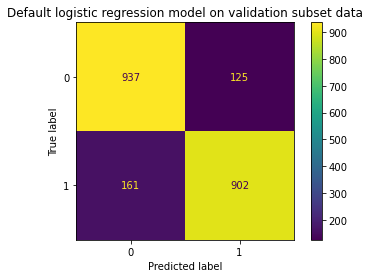

In [194]:
cf_matrix = confusion_matrix(y_val, y_hat_logit)   # compare predictions with 'actuals'

ConfusionMatrixDisplay(cf_matrix).plot(cmap='viridis')
plt.title('Default logistic regression model on validation subset data')
plt.show()

Next, we will use the **K-fold** method of validation to build a more representative picture of our data i.e. by 'sampling' we can be more certain of exposing models to the population distribution of data. Given that K-folds tend to be *odd*, 3 folds ensures that models will be exposed to sufficient data at a time to be meaningful; this might not be the case if we chose 5 folds.

To begin, we will find the optimal regularisation value for our data:

In [195]:
# suppress inevitable warnings 
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# store the results
cross_validation_scores = []
times = []

# learning rates to test
C_values = [10**n for n in range(-6,7)]

# cross-validation
for C in C_values:
    start = time.time()
    print(f'Testing regularisation parameter: C={C}...', end='\r')
    logit = LogisticRegression(C=C,random_state=42, verbose=0, n_jobs=-1, max_iter=1000)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(logit, X_remainder_scaled, y_remainder, cv = 3))
    
    cross_validation_scores.append(cv_score)
    finish = time.time()
    times.append(finish-start)

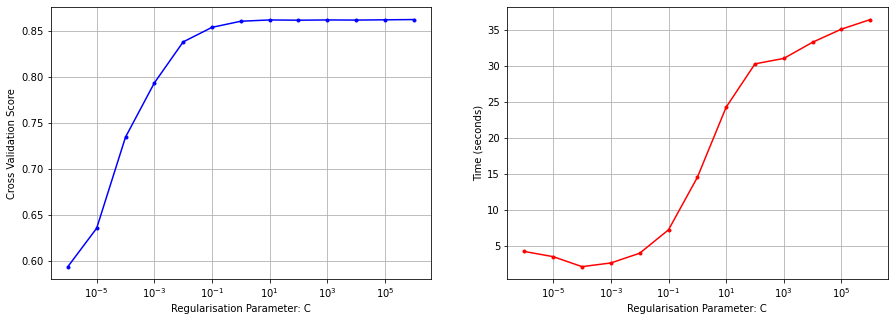

In [196]:
# visualising hyperparameter optimisation
plt.subplots(1,2, figsize=(15,5))

plt.subplot(1,2,1)
#plt.figure()
plt.plot(C_values, cross_validation_scores,label="Cross Validation Score",marker='.', color='blue')
#plt.legend()
plt.xscale("log")
plt.xlabel('Regularisation Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()

plt.subplot(1,2,2)
plt.plot(C_values, times,label="Time taken across folds per regularisation value tested",marker='.', color='red')
plt.xscale("log")
plt.xlabel('Regularisation Parameter: C')
plt.ylabel('Time (seconds)')
plt.grid()

plt.show();

It appears that **C=1** would be a good fit here, providing acceptable modelling speed AND the highest baseline accuracy.

But what about other parameters, including *penalty* and *solver*? According to the scikit-learn documentation, some penalty values are compatible only with certain solvers. However, research online (inlcuding at https://www.kaggle.com/r4rajaa/logistic-regression-with-different-solvers) suggests that the default solver - **lbfgs** - and default penalty - **l2** - is going to give some of the highest accuracy scores BUT more quickly (in general).

Research in this project (using different solvers with C=1) returned the following performance:

In [197]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    logit = LogisticRegression(C=1, solver=solver)
    start = time.time()
    cv_score = np.mean(cross_val_score(logit, X_remainder_scaled, y_remainder, cv = 3))
    finish = time.time()
    print(logit.solver)
    print('Cross validation score: ', np.round(cv_score,4))
    print('Run time: ', np.round(finish-start, 2), 'seconds')
    print('')

lbfgs
Cross validation score:  0.8594
Run time:  0.32 seconds

liblinear
Cross validation score:  0.8602
Run time:  0.27 seconds

newton-cg
Cross validation score:  0.8604
Run time:  0.94 seconds

sag
Cross validation score:  0.853
Run time:  2.76 seconds

saga
Cross validation score:  0.8512
Run time:  3.05 seconds



The differences in cross-validation score are marginal. However, it appears that the default penalty (**l2**), default regularisation (**C=1.0**) combined with the **newton-cg** solver might give an edge here. (With more time, grid search of regularisation values with different solvers might increase performance further). Using these settings, model performance is as follows using training and validation subsets:

In [198]:
model_01_logit = LogisticRegression(solver='newton-cg', verbose=0, random_state=42, n_jobs=-1)
model_01_logit.fit(X_tr, y_tr)
train_accuracy = model_01_logit.score(X_tr, y_tr)
print(f'Training accuracy: {train_accuracy}')
val_accuracy = model_01_logit.score(X_val, y_val)
print(f'Validation accuracy: {val_accuracy}')

Training accuracy: 0.8703106091165793
Validation accuracy: 0.8649411764705882


In [199]:
y_hat_model_01 = model_01_logit.predict(X_val)
report_model_01 = classification_report(y_val, y_hat_model_01)
print(report_model_01)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1062
           1       0.88      0.85      0.86      1063

    accuracy                           0.86      2125
   macro avg       0.87      0.86      0.86      2125
weighted avg       0.87      0.86      0.86      2125



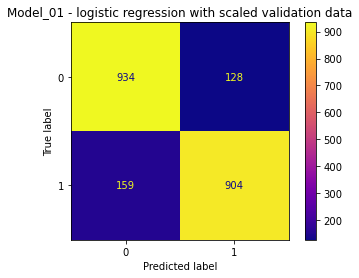

In [200]:
cf_matrix = confusion_matrix(y_val, y_hat_model_01)   # compare predictions with 'actuals'

ConfusionMatrixDisplay(cf_matrix).plot(cmap='plasma')
plt.title('Model_01 - logistic regression with scaled validation data')
plt.show()

We note that validation accuracy is ~86.5% and the model does not appear to be overfitting to the training data, with ~87.0% training accuracy. The accuracy is not especially impressive for our problem space with recall of actual delays at just ~85%.

We will look at other model types in search of improved Recall.

For each model in this section, we will export them in a *pickle* file so that they can be evaluated against unseen test data in a separate notebook.

In [201]:
pickle.dump(model_01_logit, open('model_01_logit.pkl', 'wb'))

### Principal Component Analysis

For each model type, a separate version will be training on principal components of the data. Not only will this reduce dimensionality (we currently have 176 features) but it will also mitigate multicollinearity between features and minimise model overfitting to the training data.

In [202]:
# instantiate PCA
pca = PCA(n_components=len(X_remainder.columns))

# fitting the framework to the scaled data
pca.fit_transform(X_remainder_scaled)

array([[-3.54917055e+00, -6.89823027e-01, -2.84818835e-01, ...,
        -3.24768673e-15,  1.90275902e-15,  4.20250681e-15],
       [-3.58218856e+00, -7.28177242e-01,  1.64233300e-01, ...,
        -4.46386776e-15, -3.01521271e-15, -5.65974991e-15],
       [-3.64793283e+00, -6.91809376e-01, -2.78102094e-01, ...,
         5.18497714e-15, -2.66557505e-15,  2.08409097e-15],
       ...,
       [-2.44526274e+00,  2.12472500e-01,  1.06465469e+00, ...,
        -4.10451921e-16, -6.43611883e-16,  6.50188339e-17],
       [-3.24255593e+00, -4.66593904e-01, -4.69204010e-03, ...,
        -5.09944355e-16,  2.16443940e-16, -1.40964609e-16],
       [-3.60840650e+00, -7.17340511e-01, -2.67595310e-01, ...,
         1.12287578e-18, -9.15406917e-18,  1.85681617e-16]])

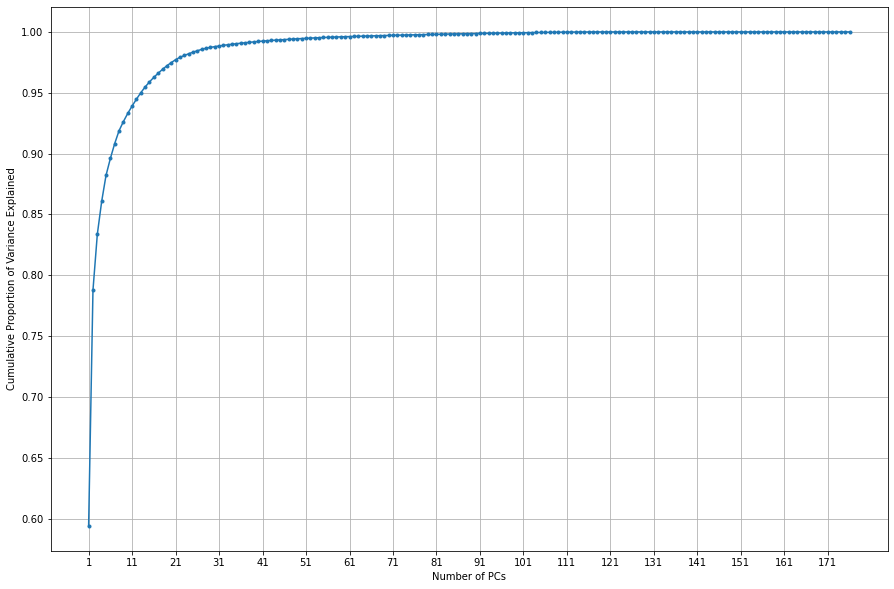

In [203]:
# EVRs for each number of PCs
expl_var_ratio = pca.explained_variance_ratio_.cumsum()

# plotting the EVRs to check for an 'elbow'
plt.figure(figsize=(15,10))
plt.plot(range(1,len(X_remainder.columns)+1),expl_var_ratio,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.grid()
plt.xticks(np.arange(1,len(X_remainder.columns)+1, 10))
plt.show()

We see the telltale 'elbow' in this graph, although the actual curve joint encompasses a range of principal component values: we will take 21 principal components as the cumulative proportion of variance is ~98%, the angle of the curve is ~45degrees, and additional PCs give much smaller increases beyond this point.

Now we can fit our logit model on PCA transformed scaled data. Again, the transformer fitted on our *training* data is applied to the *test* data.

In [204]:
# instantiate PCA transformer
pca = PCA(n_components=21, random_state=42)

X_remainder_PCA = pca.fit_transform(X_remainder_scaled)
X_test_PCA = pca.transform(X_test_scaled)

In [205]:
X_test_pca_df = pd.DataFrame(X_test_PCA)
X_test_pca_df.shape

(2361, 21)

Once again, we export our unseen (but transformed) test data for model evaluation in a later notebook.

In [206]:
X_test_pca_df.to_csv('data/X_test_pca.csv', index=False)

As before, we run hyperparameter optimisation on a new logit model, fitting to the transformed data.

In [207]:
# suppress inevitable warnings 
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# store the results
cv_scores_logit_pca = []

# learning rates to test
C_values = [10**n for n in range(-3,4)]

# cross-validation
for C in C_values:
    print(f'Testing regularisation parameter: C={C}...', end='\r')
    logit_pca = LogisticRegression(C=C,random_state=42, verbose=0, n_jobs=-1, max_iter=1000)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(logit_pca, X_remainder_PCA, y_remainder, cv = 3))
    
    cv_scores_logit_pca.append(cv_score)

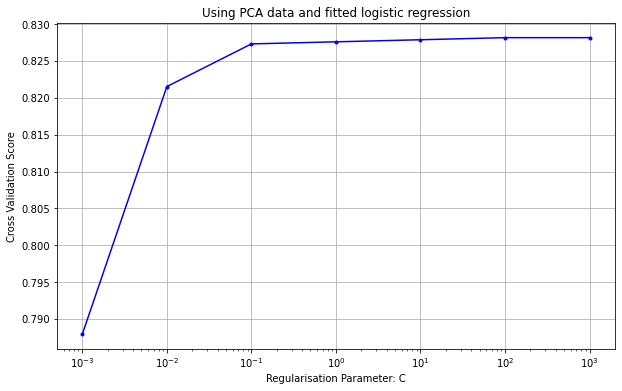

In [208]:
plt.figure(figsize=(10,6))
plt.plot(C_values, cv_scores_logit_pca,label="Cross Validation Score",marker='.', color='blue')
plt.xscale("log")
plt.xlabel('Regularisation Parameter: C')
plt.ylabel('Cross Validation Score')
plt.title('Using PCA data and fitted logistic regression')
plt.grid()
plt.show();

On this occasion, model performance is optimal with regularisation of **C=0.1**. As before, we can evaluate different solvers.

In [209]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    logit = LogisticRegression(C=0.1, solver=solver)
    start = time.time()
    cv_score = np.mean(cross_val_score(logit, X_remainder_PCA, y_remainder, cv = 3))
    finish = time.time()
    print(logit.solver)
    print('Cross validation score: ', np.round(cv_score,4))
    print('Run time: ', np.round(finish-start, 2), 'seconds')
    print('')

lbfgs
Cross validation score:  0.8273
Run time:  0.08 seconds

liblinear
Cross validation score:  0.8279
Run time:  0.07 seconds

newton-cg
Cross validation score:  0.8275
Run time:  0.12 seconds

sag
Cross validation score:  0.8276
Run time:  0.57 seconds

saga
Cross validation score:  0.8283
Run time:  0.55 seconds



There is very little difference in performance here so we use default hyperparameter settings, other than **C=0.1** moving forward.

Our transformed data is also split into training and validation subsets:

In [210]:
X_tr_pca, X_val_pca, y_tr_pca, y_val_pca = train_test_split(X_remainder_PCA, y_remainder, random_state=42, train_size=0.7, stratify=y_remainder)

In [211]:
model_02_logit_pca = LogisticRegression(C=0.1, verbose=0, random_state=42, n_jobs=-1)
model_02_logit_pca.fit(X_tr_pca, y_tr_pca)
train_accuracy = model_02_logit_pca.score(X_tr_pca, y_tr_pca)
print(f'Training accuracy: {train_accuracy}')
val_accuracy = model_02_logit_pca.score(X_val_pca, y_val_pca)
print(f'Validation accuracy: {val_accuracy}')

Training accuracy: 0.8309802339653086
Validation accuracy: 0.8324705882352941


In [212]:
y_hat_model_02_pca = model_02_logit_pca.predict(X_val_pca)
report_model_02_pca = classification_report(y_val, y_hat_model_02_pca)
print(report_model_02_pca)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1062
           1       0.86      0.80      0.83      1063

    accuracy                           0.83      2125
   macro avg       0.83      0.83      0.83      2125
weighted avg       0.83      0.83      0.83      2125



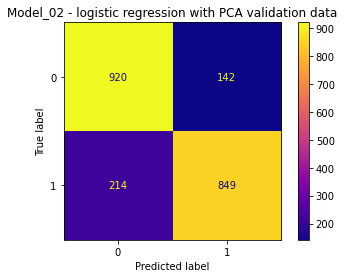

In [213]:
cf_matrix = confusion_matrix(y_val, y_hat_model_02_pca)   # compare predictions with 'actuals'

ConfusionMatrixDisplay(cf_matrix).plot(cmap='plasma')
plt.title('Model_02 - logistic regression with PCA validation data')
plt.show()

In [214]:
# export model for later evaluation
pickle.dump(model_02_logit_pca, open('model_02_logit_pca.pkl', 'wb'))

### Using Support Vector Machines (SVMs)

With data now scaled, transformed and collated for modelling use, we can dive straight into SVMs. First, a *vanilla* model.

In [215]:
svm = SVC(random_state=42)

svm.fit(X_tr, y_tr)
print(f'Training accuracy: {svm.score(X_tr, y_tr)}')
print(f'Validation accuracy: {svm.score(X_val, y_val)}')

Training accuracy: 0.8709156918112142
Validation accuracy: 0.8602352941176471


In [216]:
y_hat_svm = svm.predict(X_val)
report_svm = classification_report(y_val, y_hat_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1062
           1       0.89      0.82      0.85      1063

    accuracy                           0.86      2125
   macro avg       0.86      0.86      0.86      2125
weighted avg       0.86      0.86      0.86      2125



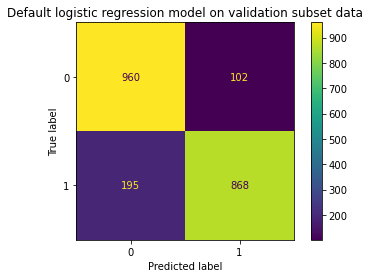

In [217]:
cf_matrix = confusion_matrix(y_val, y_hat_svm)   # compare predictions with 'actuals'

ConfusionMatrixDisplay(cf_matrix).plot(cmap='viridis')
plt.title('Default logistic regression model on validation subset data')
plt.show()

And now, **K-fold** cross-validation:

In [218]:
ind_cv_scores = cross_val_score(svm, X_remainder_scaled, y_remainder, cv = 3)
print(ind_cv_scores)
cv_score = np.mean(ind_cv_scores)
print(f'Cross-validation score: {cv_score}')

[0.86192291 0.8369335  0.86234646]
Cross-validation score: 0.8537342933785119


As for the logistic regression, we can optimise for regularisation in an SVM model:

In [219]:
# hyperparameters to test
param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

# instantiate model
grid_svm = GridSearchCV(svm, param_grid=param_grid, verbose=3, n_jobs=-1)

# fit model
grid_svm.fit(X_remainder_scaled, y_remainder)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000]},
             verbose=3)

In [220]:
grid_svm.best_params_

{'C': 10000}

We see that **C=10000** appears to be optimal. (Given more time, we could extend the number of regularisation values to test).

We fit our model to the training data.

In [221]:
model_03_svm = SVC(C=10000, random_state=42)

model_03_svm.fit(X_tr, y_tr)
print(f'Training accuracy: {model_03_svm.score(X_tr, y_tr)}')
print(f'Validation accuracy: {model_03_svm.score(X_val, y_val)}')

Training accuracy: 0.9981847519160952
Validation accuracy: 0.9063529411764706


Noting ~99.8% training accuracy, there is a danger that this model is overfitting to the training data.

We can visualise where overfitting might begin, using our own judgement to optimise the regularisation value.

In [222]:
training = []
validation = []
C_values = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

for c in C_values:
    print(f'Currently working on regularisation value {c}')
    svm = SVC(C=c, random_state=42)
    svm.fit(X_tr, y_tr)
    training.append(svm.score(X_tr, y_tr))
    validation.append(svm.score(X_val, y_val))

Currently working on regularisation value 0.0001
Currently working on regularisation value 0.001
Currently working on regularisation value 0.01
Currently working on regularisation value 0.1
Currently working on regularisation value 1
Currently working on regularisation value 10
Currently working on regularisation value 100
Currently working on regularisation value 1000
Currently working on regularisation value 10000


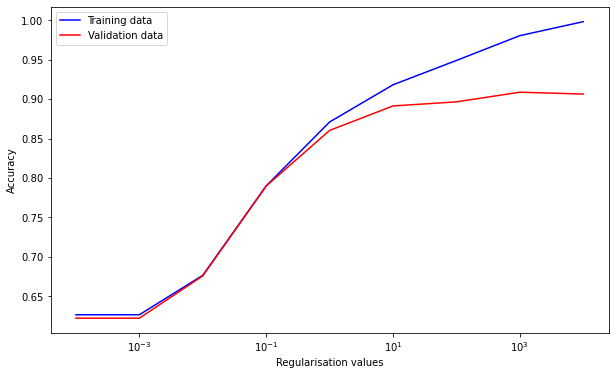

In [223]:
settings = ['0.0001','0.001','0.01','0.1','1.0','10','100','1000','10000']
plt.figure(figsize=(10,6))
plt.plot(C_values, training, color='blue', label='Training data')
plt.plot(C_values, validation, color='red', label='Validation data')
plt.xscale('log')
plt.legend()
plt.xlabel('Regularisation values')
plt.ylabel('Accuracy')
plt.show()

Although validation accuracy continues to rise beyond **C=1.0**, it does begin to plateau as training accuracy increases steadily (overfitting). In this case, we will discount our earlier grid search in favour of our own intuition. We will fit our model to the training data again but with regularisation of **C=1.0**.

In [224]:
model_03_svm = SVC(C=1.0, random_state=42)

model_03_svm.fit(X_tr, y_tr)
print(f'Training accuracy: {model_03_svm.score(X_tr, y_tr)}')
print(f'Validation accuracy: {model_03_svm.score(X_val, y_val)}')

Training accuracy: 0.8709156918112142
Validation accuracy: 0.8602352941176471


With this adjustment, training accuracy has dropped ~12.7% and validation accuracy has reduced ~4.6%. With validation accuracy only ~1.1% below training accuracy, it appears that we have mitigated the previous overfitting.

As we will be visualising a lot of models going forward, we can define a function to simplify the process:

In [225]:
def summary(model, features, target, title):
    
    '''
    Model summariser
    ----------------
    
    Parameters:
    model: name of fitted model
    features: X columns (e.g. X_val)
    target: array of target values (e.g. y)
    title: Title of confusion matrix ('')
    
    Returns:
    Classification report & Confusion matrix
    
    '''
    
    
    y_hat = model.predict(features)
    report = classification_report(target, y_hat)
    print(report)
    
    cf_matrix = confusion_matrix(target, y_hat)
    ConfusionMatrixDisplay(cf_matrix).plot(cmap='viridis')
    plt.title(title)
    plt.show()

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1062
           1       0.89      0.82      0.85      1063

    accuracy                           0.86      2125
   macro avg       0.86      0.86      0.86      2125
weighted avg       0.86      0.86      0.86      2125



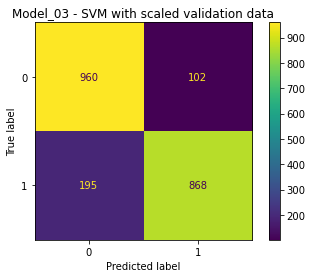

In [226]:
summary(model_03_svm, X_val, y_val, 'Model_03 - SVM with scaled validation data')

In [227]:
pickle.dump(model_03_svm, open('model_03_svm.pkl', 'wb'))

####  SVM on principal components

In [228]:
training = []
validation = []
C_values = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

for c in C_values:
    print(f'Currently working on regularisation value {c}', end='\r')
    svm = SVC(C=c, random_state=42)
    svm.fit(X_tr_pca, y_tr_pca)
    training.append(svm.score(X_tr_pca, y_tr_pca))
    validation.append(svm.score(X_val_pca, y_val_pca))

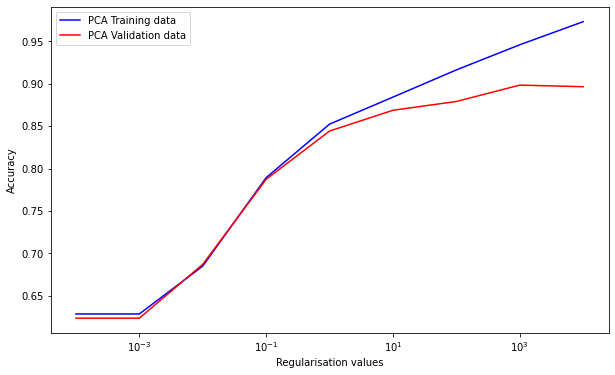

In [229]:
settings = ['0.0001','0.001','0.01','0.1','1.0','10','100','1000','10000']
plt.figure(figsize=(10,6))
plt.plot(C_values, training, color='blue', label='PCA Training data')
plt.plot(C_values, validation, color='red', label='PCA Validation data')
plt.xscale('log')
plt.legend()
plt.xlabel('Regularisation values')
plt.ylabel('Accuracy')
plt.show()

As before, we see that the training accuracy could 'run away' if we allowed any regularisation value. However, we select **C=10** here as the gap between training and validation accuracy only begins to widen substantially beyond this.

In [230]:
model_04_svm_pca = SVC(C=10, random_state=42)
model_04_svm_pca.fit(X_tr_pca, y_tr_pca)
print(f'Training accuracy: {model_04_svm_pca.score(X_tr_pca, y_tr_pca)}')
print(f'Validation accuracy: {model_04_svm_pca.score(X_val_pca, y_val_pca)}')

Training accuracy: 0.8842275110931828
Validation accuracy: 0.8687058823529412


              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1062
           1       0.91      0.82      0.86      1063

    accuracy                           0.87      2125
   macro avg       0.87      0.87      0.87      2125
weighted avg       0.87      0.87      0.87      2125



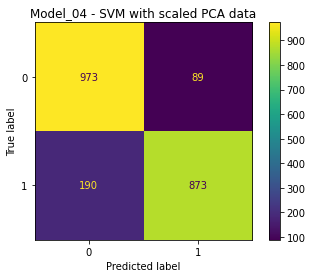

In [231]:
summary(model_04_svm_pca, X_val_pca, y_val_pca, 'Model_04 - SVM with scaled PCA data')

In [232]:
pickle.dump(model_04_svm_pca, open('model_04_svm_pca.pkl', 'wb'))

### Using RandomForestClassifier

We begin by fitting a *vanilla* model:

In [233]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_tr, y_tr)

train_accuracy = RF_model.score(X_tr, y_tr)
print(f'Training accuracy: {train_accuracy}')
val_accuracy = RF_model.score(X_val, y_val)
print(f'Validation accuracy: {val_accuracy}')

Training accuracy: 0.9997983057684551
Validation accuracy: 0.9355294117647058


Immediately, we can see evidence that this ensemble model might be overfitting to the training data, as would be typical with individual decision tree classifiers. With 99.98% training accuracy, we will need to proceed to hyperparameter optimisation to mitigate this.

In [234]:
param_grid = {'n_estimators': np.arange(1,102,10),
             'max_depth': np.arange(2,11,2),
             'max_features': np.arange(2,11,2)}

grid_rf = GridSearchCV(RF_model, param_grid=param_grid, verbose=1, n_jobs=-1)

grid_rf.fit(X_remainder_scaled, y_remainder)

Fitting 5 folds for each of 275 candidates, totalling 1375 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10]),
                         'max_features': array([ 2,  4,  6,  8, 10]),
                         'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101])},
             verbose=1)

In [235]:
grid_rf.best_params_

{'max_depth': 10, 'max_features': 10, 'n_estimators': 71}

In [236]:
RF_model = RandomForestClassifier(n_estimators=71, max_depth=10,
                                  max_features=10, random_state=42)

ind_cv_scores = cross_val_score(RF_model, X_remainder_scaled, y_remainder, cv = 3)
print(ind_cv_scores)
cv_score = np.mean(ind_cv_scores)
print(f'Cross-validation score: {cv_score}')

[0.89538331 0.87251165 0.88691233]
Cross-validation score: 0.8849357616829027


We see that three different models on three different combinations of the data return very similar validation accuracy. This reassures us that the samples are at least generally analogous to the population data. Let's explore further...

In [237]:
# empty lists to store training and validation scores
training = []
validation = []

# hyperparameter settings to test
max_depth = np.arange(1,21)

for m in max_depth:
    print(f'Currently working on max_depth value {m}', end='\r')
    rf = RandomForestClassifier(max_depth=m, random_state=42)
    rf.fit(X_tr, y_tr)
    training.append(rf.score(X_tr, y_tr))
    validation.append(rf.score(X_val, y_val))

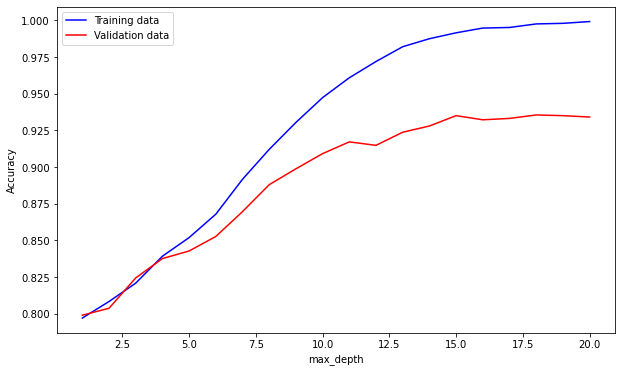

In [238]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, training, color='blue', label='Training data')
plt.plot(max_depth, validation, color='red', label='Validation data')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [239]:
training = []
validation = []
max_features = np.arange(1,21)

for m in max_features:
    print(f'Currently working on max_features value {m}', end='\r')
    rf = RandomForestClassifier(max_features=m, random_state=42)
    rf.fit(X_tr, y_tr)
    training.append(rf.score(X_tr, y_tr))
    validation.append(rf.score(X_val, y_val))

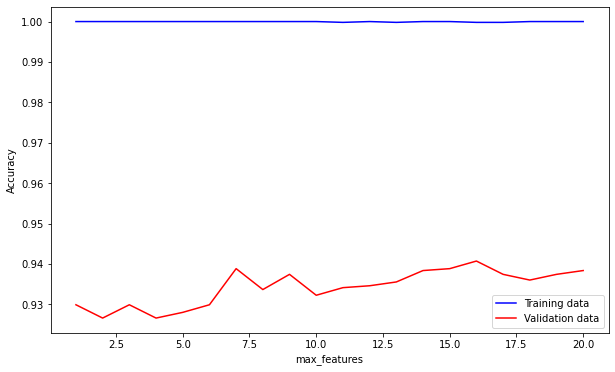

In [240]:
plt.figure(figsize=(10,6))
plt.plot(max_features, training, color='blue', label='Training data')
plt.plot(max_features, validation, color='red', label='Validation data')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()

In [241]:
training = []
validation = []
n_estimators = np.arange(1,101)

for m in n_estimators:
    print(f'Currently working on {m} trees in the forest!', end='\r')
    rf = RandomForestClassifier(n_estimators=m, random_state=42)
    rf.fit(X_tr, y_tr)
    training.append(rf.score(X_tr, y_tr))
    validation.append(rf.score(X_val, y_val))

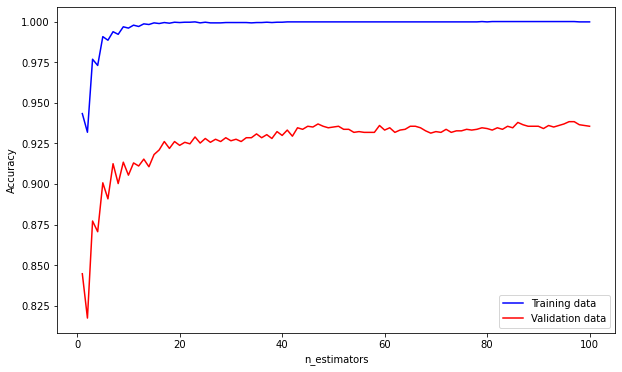

In [242]:
plt.figure(figsize=(10,6))
plt.plot(n_estimators, training, color='blue', label='Training data')
plt.plot(n_estimators, validation, color='red', label='Validation data')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

This is a real mixed-bag of observations! **max_depth=5** is probably acceptable; beyond this accuracy gain accelerates in the training data and less so in the validation data. **max_features** makes no difference to the model overfitting to the training data. Increases in **n_estimators** sees the model overfitting to the training data quickly.

A compromise will be setting **max_depth=5** and **n_estimators=5**.

In [243]:
model_05_rf = RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)
model_05_rf.fit(X_tr, y_tr)
print(f'Training accuracy: {model_05_rf.score(X_tr, y_tr)}')
print(f'Validation accuracy: {model_05_rf.score(X_val, y_val)}')

Training accuracy: 0.8245260185558693
Validation accuracy: 0.8145882352941176


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1062
           1       0.82      0.80      0.81      1063

    accuracy                           0.81      2125
   macro avg       0.81      0.81      0.81      2125
weighted avg       0.81      0.81      0.81      2125



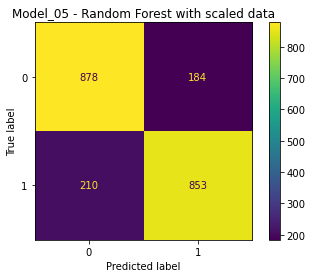

In [244]:
summary(model_05_rf, X_val, y_val, 'Model_05 - Random Forest with scaled data')

We have seen that the RandomForestClassifier will very easily overfit to the training data. By introducing bespoke hyperparameter settings, we see performance fall away dramatically.

*More time and resource (beyond the scope of this project) might optimise the model further.*

In [245]:
pickle.dump(model_05_rf, open('model_05_rf.pkl', 'wb'))

#### RF on principal components

Given the sensitivity of model performance to hyperparameter settings, we must save time here and use the same settings as in Model_05 on our PCA data.

In [246]:
model_06_rf_pca = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)
model_06_rf_pca.fit(X_tr_pca, y_tr_pca)
print(f'Training accuracy: {model_06_rf_pca.score(X_tr_pca, y_tr_pca)}')
print(f'Validation accuracy: {model_06_rf_pca.score(X_val_pca, y_val_pca)}')

Training accuracy: 0.8190802743041549
Validation accuracy: 0.8037647058823529


              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1062
           1       0.83      0.77      0.80      1063

    accuracy                           0.80      2125
   macro avg       0.81      0.80      0.80      2125
weighted avg       0.81      0.80      0.80      2125



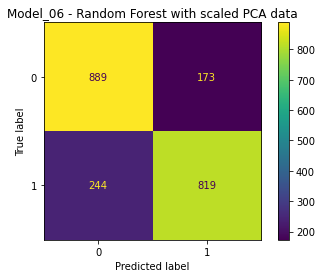

In [247]:
summary(model_06_rf_pca, X_val_pca, y_val_pca, 'Model_06 - Random Forest with scaled PCA data')

In [248]:
pickle.dump(model_06_rf_pca, open('model_06_rf_pca.pkl', 'wb'))

### Using XG Boost

In [249]:
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_tr, y_tr)
print('Training accuracy: ', xgb.score(X_tr, y_tr))
print('Validation accuracy: ', xgb.score(X_val, y_val))

C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy:  1.0
Validation accuracy:  0.932235294117647


We have yet another *vanilla* model which has overfitetd to the training data. Let's take a look at performance given different hyperparameter settings:

In [250]:
training = []
validation = []
n_estimators: np.arange(1,101)

for m in n_estimators:
    print(f'Currently working on {m} trees in the forest!', end='\r')
    xgb = XGBClassifier(n_estimators=m, random_state=42)
    xgb.fit(X_tr, y_tr)
    training.append(xgb.score(X_tr, y_tr))
    validation.append(xgb.score(X_val, y_val))

[16:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


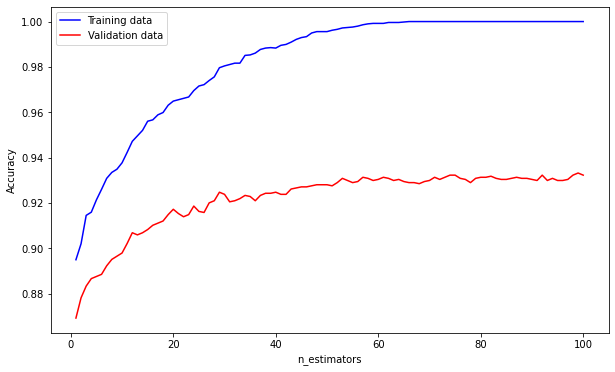

In [251]:
plt.figure(figsize=(10,6))
plt.plot(n_estimators, training, color='blue', label='Training data')
plt.plot(n_estimators, validation, color='red', label='Validation data')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

We can clearly see how quickly the model can overfit to the training data but **n_estimators=10** seems a good selection given validation data begins to plateau beyond this point.

In [252]:
training = []
validation = []
max_depth: np.arange(1,11)

for m in max_depth:
    print(f'Currently working on max_depth={m}', end='\r')
    xgb = XGBClassifier(max_depth=m, random_state=42)
    xgb.fit(X_tr, y_tr)
    training.append(xgb.score(X_tr, y_tr))
    validation.append(xgb.score(X_val, y_val))

[16:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


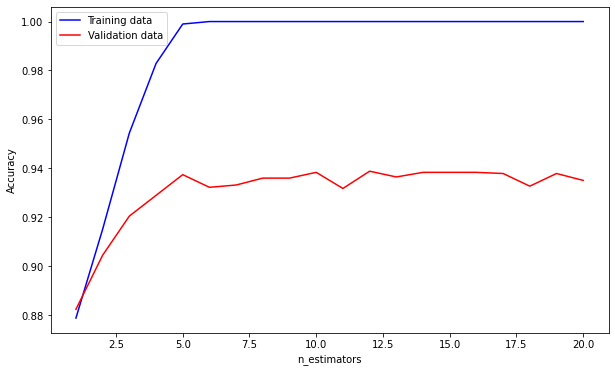

In [253]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, training, color='blue', label='Training data')
plt.plot(max_depth, validation, color='red', label='Validation data')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

We might get away with **max_depth=2** before overfitting occurs.

In [254]:
model_07_xgb = XGBClassifier(n_jobs=-1, max_depth=2, n_estimators=10, random_state=42, use_label_encoder=True)
model_07_xgb.fit(X_tr, y_tr)
print('Training accuracy: ', model_07_xgb.score(X_tr, y_tr))
print('Validation accuracy: ', model_07_xgb.score(X_val, y_val))

[16:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy:  0.8620411456232352
Validation accuracy:  0.8625882352941177


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1062
           1       0.87      0.85      0.86      1063

    accuracy                           0.86      2125
   macro avg       0.86      0.86      0.86      2125
weighted avg       0.86      0.86      0.86      2125



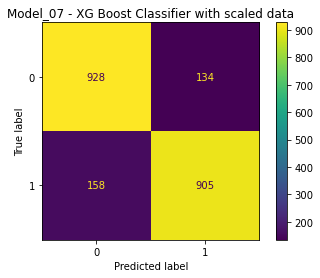

In [255]:
summary(model_07_xgb, X_val, y_val, 'Model_07 - XG Boost Classifier with scaled data')

In [256]:
pickle.dump(model_07_xgb, open('model_07_xgb.pkl', 'wb'))

#### XGB on principal components

As with the RandomTreeClassifier, model performance is very senesitive to hyperparameter settings. Again, we use the same settings as in Model_07 on our PCA data.

In [257]:
model_08_xgb_pca = XGBClassifier(n_jobs=-1, max_depth=2, n_estimators=10, random_state=42)
model_08_xgb_pca.fit(X_tr_pca, y_tr)
print('Training accuracy: ', model_08_xgb_pca.score(X_tr_pca, y_tr))
print('Validation accuracy: ', model_08_xgb_pca.score(X_val_pca, y_val))

[16:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy:  0.7948769665187576
Validation accuracy:  0.7901176470588235


C:\Users\epjac\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1062
           1       0.80      0.78      0.79      1063

    accuracy                           0.79      2125
   macro avg       0.79      0.79      0.79      2125
weighted avg       0.79      0.79      0.79      2125



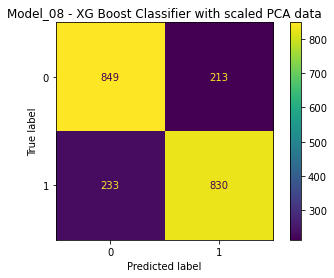

In [258]:
summary(model_08_xgb_pca, X_val_pca, y_val_pca, 'Model_08 - XG Boost Classifier with scaled PCA data')

In [259]:
pickle.dump(model_08_xgb_pca, open('model_08_xgb_pca.pkl', 'wb'))

### Using a Keras convolutional neural network (CNN)

In this section, we optimise the structure of a CNN in an effort to beat the accuracy and recall scores of our machine learning models.

We start with a very simple sequential model, using a sigmoid function to give a binary ouput:

In [260]:
cnn = keras.Sequential()

cnn.add(layers.Dense(1, activation="sigmoid"))

In [261]:
cnn.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [262]:
history = cnn.fit(X_remainder_scaled, y_remainder, validation_split=0.3, epochs=100, verbose=0)

In [263]:
train_accuracy = history.history["binary_accuracy"][-1]
val_accuracy = history.history["val_binary_accuracy"][-1]

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}") 

Train Accuracy: 0.8715
Validation Accuracy: 0.8607


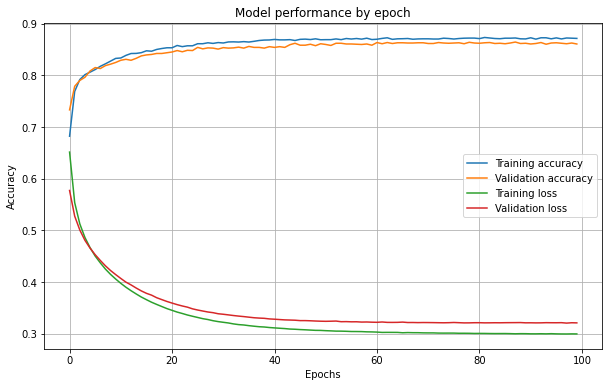

In [264]:
plt.figure(figsize=(10,6))
plt.plot(history.history['binary_accuracy'], color='C0', label='Training accuracy')
plt.plot(history.history['val_binary_accuracy'], color='C1', label='Validation accuracy')
plt.plot(history.history['loss'], color='C2', label='Training loss')
plt.plot(history.history['val_loss'], color='C3', label='Validation loss')
plt.grid()

plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model performance by epoch')
plt.show()

In [265]:
cnn = keras.Sequential()

cnn.add(layers.Dense(64, activation="relu"))    # dense layer A
cnn.add(layers.Dropout(0.2))                    # dropout layer 1
cnn.add(layers.Dense(32, activation="relu"))    # dense layer B
cnn.add(layers.BatchNormalization())            
cnn.add(layers.Dense(8, activation="relu"))     # dense layer C
cnn.add(layers.Dropout(0.2))                    # dropout layer 2
cnn.add(layers.Dense(4, activation="relu"))     # dense layer D
cnn.add(layers.Dropout(0.2))                    # dropout layer 3
cnn.add(layers.Dense(1, activation="sigmoid"))  # dense layer E

In [266]:
cnn.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [267]:
history = cnn.fit(X_remainder_scaled, y_remainder, validation_split=0.3, epochs=50, verbose=0)

In [268]:
train_accuracy = history.history["binary_accuracy"][-1]
val_accuracy = history.history["val_binary_accuracy"][-1]

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}") 

Train Accuracy: 0.9244
Validation Accuracy: 0.9012


We summarise the model design and optimisation as follows:

- Dense layer E only (training accuracy, 87.05%; validation accuracy, 85.98%)
- Dense layers A,B,C,D,E only (training accuracy, 99.29%; validation accuracy, 91.25%)
    - model overfitting to training data
- Above with dropout layer 1 (training accuracy, 96.59%; validation accuracy, 90.82%)
    - significant mitigation of overfitting but marginal decrease in validation accuracy
- Above with dropout layer 2 (training accuracy, 95.72%; validation accuracy, 91.25%)
    - further mitigation of overfitting with gain in validation accuracy
- Above with dropout layer 3 (training accuracy, 93.47%; validation accuracy, 90.54%)
    - further mitigation of overfitting with slight reduction in validation accuracy
- Above with batch normalisation layer (training accuracy, 92.15%; validation accuracy, 90.49%)
    - gap between training and validation accuracy reduced

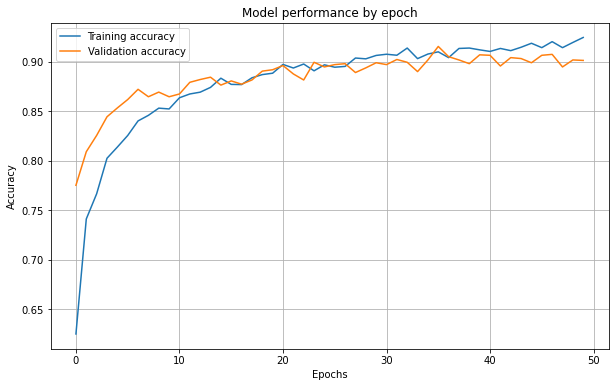

In [269]:
plt.figure(figsize=(10,6))
plt.plot(history.history['binary_accuracy'], color='C0', label='Training accuracy')
plt.plot(history.history['val_binary_accuracy'], color='C1', label='Validation accuracy')
plt.grid()

plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model performance by epoch')
plt.show()

We see that 90% validation accuracy seems quite reachable with further optimisation. Training accuracy does not run away from validationa accuracy although the gap widens after 30 epochs. An *EarlyStopping* function might be considered in future improvements in this project but it is beyond the current scope.

In [270]:
model_09_keras = keras.Sequential()

model_09_keras.add(layers.Dense(64, activation="relu"))    
model_09_keras.add(layers.Dropout(0.2))                    
model_09_keras.add(layers.Dense(32, activation="relu"))    
model_09_keras.add(layers.BatchNormalization())            
model_09_keras.add(layers.Dense(8, activation="relu"))     
model_09_keras.add(layers.Dropout(0.2))                    
model_09_keras.add(layers.Dense(4, activation="relu"))     
model_09_keras.add(layers.Dropout(0.2))                    
model_09_keras.add(layers.Dense(1, activation="sigmoid"))  

In [271]:
model_09_keras.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [272]:
history = model_09_keras.fit(X_remainder_scaled, y_remainder, validation_split=0.3, epochs=50, verbose=0)

In [273]:
train_accuracy = history.history["binary_accuracy"][-1]
val_accuracy = history.history["val_binary_accuracy"][-1]

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}") 

Train Accuracy: 0.9334
Validation Accuracy: 0.8951


In [274]:
predictions = model_09_keras.predict(X_val)

In [275]:
report_newmodel = classification_report(y_val, np.round(predictions,0))    # predictions must be rounded to binary integers
print(report_newmodel)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1062
           1       0.94      0.96      0.95      1063

    accuracy                           0.95      2125
   macro avg       0.95      0.95      0.95      2125
weighted avg       0.95      0.95      0.95      2125



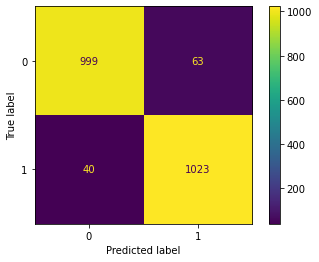

In [276]:
cf_matrix = confusion_matrix(y_val, np.round(predictions,0))   # compare predictions with 'actuals'

ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

We can see that the convolutional neural network is providing good accuracy but, with a recall of 94% and precision of 97%, it is far superior to the machine learning models. That said, we accept that it is still overfitting a bit to the training data (although nowhere near as much as before!).

In [277]:
model_09_keras.save('model_09_keras')

INFO:tensorflow:Assets written to: model_09_keras\assets


#### ConvNet on principal components

In [278]:
model_10_keras_pca = keras.Sequential()

model_10_keras_pca.add(layers.Dense(64, activation="relu"))    
model_10_keras_pca.add(layers.Dropout(0.2))                    
model_10_keras_pca.add(layers.Dense(32, activation="relu"))    
model_10_keras_pca.add(layers.BatchNormalization())            
model_10_keras_pca.add(layers.Dense(8, activation="relu"))     
model_10_keras_pca.add(layers.Dropout(0.2))                    
model_10_keras_pca.add(layers.Dense(4, activation="relu"))     
model_10_keras_pca.add(layers.Dropout(0.2))                    
model_10_keras_pca.add(layers.Dense(1, activation="sigmoid"))  

In [279]:
model_10_keras_pca.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [280]:
history = model_10_keras_pca.fit(X_remainder_PCA, y_remainder, validation_split=0.3, epochs=100, verbose=0)

**N.B.** The number of epochs had to be increased to accommodate a slower learning rate.

In [281]:
train_accuracy = history.history["binary_accuracy"][-1]
val_accuracy = history.history["val_binary_accuracy"][-1]

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}") 

Train Accuracy: 0.8772
Validation Accuracy: 0.8946


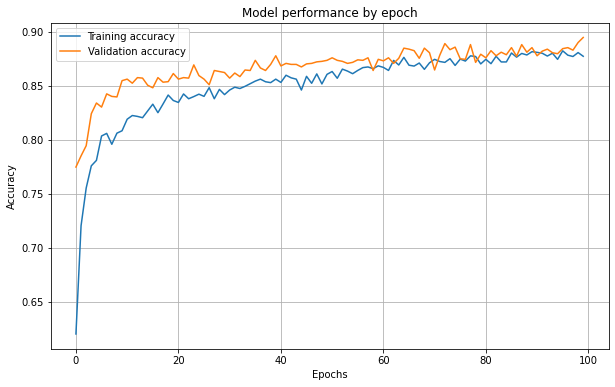

In [282]:
plt.figure(figsize=(10,6))
plt.plot(history.history['binary_accuracy'], color='C0', label='Training accuracy')
plt.plot(history.history['val_binary_accuracy'], color='C1', label='Validation accuracy')
plt.grid()

plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model performance by epoch')
plt.show()

It is possible that accuracy would improve a little more with additional epochs. However, we have a model here that is not overfitting AND is giving better validation accuracy than any of the other machine learning models.

In [283]:
y_hat = model_10_keras_pca.predict(X_remainder_PCA)
report_newmodel = classification_report(y_remainder, np.round(y_hat,0))   # must round predictions to binary
print(report_newmodel)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3541
           1       0.94      0.89      0.92      3542

    accuracy                           0.92      7083
   macro avg       0.92      0.92      0.92      7083
weighted avg       0.92      0.92      0.92      7083



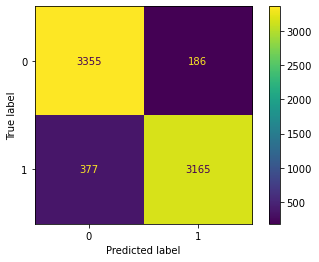

In [284]:
cf_matrix = confusion_matrix(y_remainder, np.round(y_hat,0))   # compare predictions with 'actuals'

ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [285]:
model_10_keras_pca.save('model_10_keras_pca')

INFO:tensorflow:Assets written to: model_10_keras_pca\assets


## Insights from log-odds coefficients

One significant advantage of logistic regression over neural networks, gradient boosting ML models and other ensemble models is being 'white-box' i.e. you can view every feature in any model, from start to finish.

Despite logistic regression not giving the best accuracy or recall in validation testing above, we CAN use the log-odds coefficients arising from the model fitted to the scaled data (note it is very difficult to infer original weightings from principal components so we will not be using the *PCA* version).

### Increasing and reducing the odds of breaching the delay threshold

In [286]:
pd.DataFrame(model_01_logit.coef_, columns=X.columns).sort_values(by=0, axis=1, ascending=False)

,avg_delay_arrival_all_trains_mins,dep__NICE VILLE,lg_930,dep__AVIGNON TGV,arr__PARIS NORD,dep__LE CREUSOT MONTCEAU MONTCHANIN,arr__MULHOUSE VILLE,arr__LILLE,dep__TOURCOING,dep__VANNES,arr__NICE VILLE,arr__DIJON VILLE,dep__RENNES,arr__LE CREUSOT MONTCEAU MONTCHANIN,dep__METZ,dep__ST PIERRE DES CORPS,lg_752100,dep__DOUAI,arr__TOURS,arr__PERPIGNAN,lg_226310,lg_89,arr__MONTPELLIER,arr__MARNE LA VALLEE,lg_1,arr__CHAMBERY CHALLES LES EAUX,arr__PARIS LYON,dep__CHAMBERY CHALLES LES EAUX,dep__ANNECY,dep__PARIS MONTPARNASSE,dep__LE MANS,dep__NIMES,lg_431,Centre,Languedoc-Roussillon,lg_900,arr__SAINT ETIENNE CHATEAUCREUX,dep__ARRAS,dep__NANTES,arr__PARIS MONTPARNASSE,arr__LE MANS,Bretagne,arr__AVIGNON TGV,Alsace,Aquitaine,arr__VALENCE ALIXAN TGV,lg_834,lg_750,dep__ANGOULEME,dep__VALENCE ALIXAN TGV,Nord-Pas-de-Calais,arr__RENNES,dep__MARNE LA VALLEE,Bourgogne,dep__LA ROCHELLE VILLE,arr__NIMES,lg_677,lg_5,lg_226,arr__TOULOUSE MATABIAU,other_works,dep__TOULON,lg_640,Midi-Pyrénées,Route_Distance_km,lg_752,arr__DUNKERQUE,arr__GRENOBLE,delayed_departures,arr__REIMS,lg_890,delay_signalling_%,comms_works,dep__NANCY,dep__BORDEAUX ST JEAN,arr__QUIMPER,Picardie,delay_rolling_stock_%,arr__BELLEGARDE (AIN),lg_262,dep__ST MALO,arr__DOUAI,Île-de-France,avg_delay_departure_all_trains_mins,lg_515,month,arr__PARIS EST,modernisation_works,arr__STRASBOURG,track_works,land_works,Auvergne-Rhône-Alpes,delay_passengers_%,signal_works,delay_staffing_logistics_%,arr__BORDEAUX ST JEAN,dep__ANGERS SAINT LAUD,Lorraine,avg_speed_restriction,arr__LYON PART DIEU,dep__SAINT ETIENNE CHATEAUCREUX,lg_468,lg_470,delay_external_cause_%,overhead_works,dep__POITIERS,arr__METZ,dep__LILLE,dep__TOURS,dep__PARIS NORD,Champagne-Ardenne,delay_maintenance_%,dep__LYON PART DIEU,arr__ST PIERRE DES CORPS,Provence-Alpes-Côte-d'Azur,lg_450,dep__BREST,lg_850,lg_14,arr__ANGERS SAINT LAUD,arr__POITIERS,lg_441,dep__BESANCON FRANCHE COMTE TGV,lg_278,dep__STRASBOURG,lg_429,Pays de la Loire,arr__ST MALO,dep__TOULOUSE MATABIAU,arr__MARSEILLE ST CHARLES,arr__BREST,dep__REIMS,lg_566,Poitou-Charentes,arr__ANGOULEME,arr__NANTES,dep__BELLEGARDE (AIN),lg_768300,lg_830,Franche-Comté,dep__PERPIGNAN,lg_538,dep__QUIMPER,lg_70,expected_journeys,lg_420,lg_301,dep__MULHOUSE VILLE,arr__BESANCON FRANCHE COMTE TGV,arr__LAVAL,arr__NANCY,arr__LA ROCHELLE VILLE,lg_216,lg_897,arr__MACON LOCHE,lg_905,dep__DUNKERQUE,dep__LAVAL,dep__PARIS EST,arr__VANNES,dep__GRENOBLE,dep__PARIS LYON,dep__MARSEILLE ST CHARLES,dep__MONTPELLIER,dep__AIX EN PROVENCE TGV,arr__ARRAS,dep__DIJON VILLE,arr__AIX EN PROVENCE TGV,lg_408,dep__PARIS VAUGIRARD,arr__ANNECY,arr__PARIS VAUGIRARD,arr__TOURCOING,dep__MACON LOCHE,arr__TOULON,avg_time_mins
0,4.047445,1.838181,1.572619,1.532626,1.485115,1.3728,1.23357,1.159525,1.134457,1.104045,1.09162,0.968126,0.941185,0.935399,0.793732,0.749273,0.741821,0.738389,0.709864,0.701409,0.682155,0.673843,0.667214,0.654256,0.6295,0.618643,0.588647,0.57716,0.576067,0.557439,0.526569,0.497941,0.476829,0.476829,0.471772,0.457445,0.445252,0.428565,0.423599,0.420536,0.411084,0.402046,0.387952,0.382347,0.379906,0.377919,0.3757,0.373262,0.367949,0.347051,0.331842,0.322931,0.321909,0.308599,0.302374,0.302248,0.291838,0.275714,0.271197,0.265157,0.264978,0.261844,0.245247,0.245247,0.242493,0.233179,0.214353,0.20593,0.20274,0.198046,0.197261,0.194905,0.18286,0.180577,0.162455,0.160434,0.148107,0.142121,0.128782,0.119506,0.082107,0.077012,0.075419,0.064915,0.05147,0.045711,0.024459,0.022499,0.01439,0.012547,0.003327,0.002092,-0.005053,-0.022683,-0.027492,-0.027796,-0.029346,-0.032759,-0.035173,-0.055155,-0.07199,-0.08053,-0.08053,-0.089394,-0.094277,-0.107421,-0.11989,-0.124433,-0.138975,-0.178087,-0.183734,-0.189228,-0.190168,-0.194012,-0.195766,-0.199455,-0.213009,-0.215446,-0.215446,-0.221579,-0.22603,-0.226927,-0.239962,-0.245743,-0.261543,-0.27949,-0.27949,-0.309034,-0.311749,-0.334248,-0.341604,-0.349021,-0.369831,-0.369831,-0.371738,-0.372128,-0.388965,-0.40197,-0.40197,-0.40197,-0.409571,-0.412496,-0.453221,-0.45944

We can access the log-odds coefficients directly but we prefer to use the exponent of them to give highly-interpretable odds. That is, increasing or descreasing the odds of breaching the delay threshold IF the feature is present on a route.

In [287]:
# exponent of log-odds
odds = np.exp(model_01_logit.coef_)

coef_analysis = pd.DataFrame(odds, columns=X.columns).sort_values(by=0, axis=1, ascending=False).T
coef_analysis.rename(columns={0:'odds'}, inplace=True)
coef_analysis.reset_index(inplace=True)
coef_analysis

,index,odds
0,avg_delay_arrival_all_trains_mins,57.250979
1,dep__NICE VILLE,6.285098
2,lg_930,4.819252
3,dep__AVIGNON TGV,4.630321
4,arr__PARIS NORD,4.415472
...,...,...
171,arr__PARIS VAUGIRARD,0.252108
172,arr__TOURCOING,0.251528
173,dep__MACON LOCHE,0.229845
174,arr__TOULON,0.198091


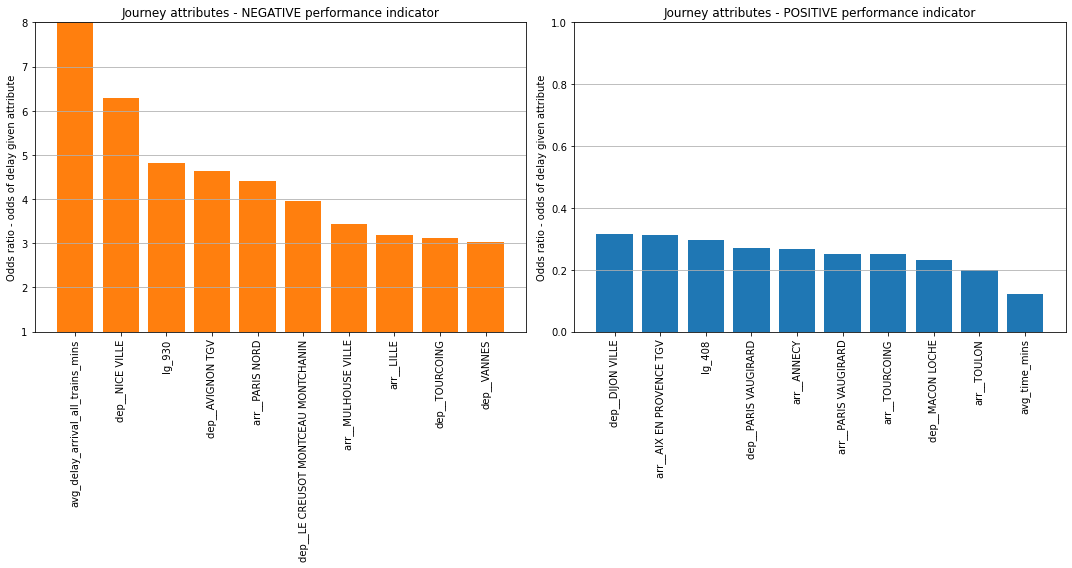

In [289]:
plt.subplots(1,2, figsize=(15,8))

plt.subplot(1,2,1)
plt.bar(coef_analysis['index'].head(10), coef_analysis['odds'].head(10), color='C1')
plt.xticks(rotation=90)
plt.ylim(1,8)   # starting from 1 (evens)
plt.ylabel('Odds ratio - odds of delay given attribute')
plt.grid(axis='y')
plt.title('Journey attributes - NEGATIVE performance indicator')

plt.subplot(1,2,2)
plt.bar(coef_analysis['index'].tail(10), coef_analysis['odds'].tail(10), color='C0')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.ylabel('Odds ratio - odds of delay given attribute')
plt.grid(axis='y')
plt.title('Journey attributes - POSITIVE performance indicator')

plt.tight_layout()

# export image for presentation
plt.savefig('neg_pos_attributes.png', dpi=360)

We see that having a departure from NICE VILLE on a route plan increases the odds of the route breaching the 10% delay to ~625% of the risk if it wasn't on the route plan. Conversely, having an arrival at TOULON on the route plan decreases the odds by ~80%.

*Note that we are only interested in modelling physical attributes although we acknowledge the strong association between 'avg_delay_arrival_all_trains_mins' and routes breaching the delay threshold.*

We can visualise these significant attributes as follows (in a Tableau-generated map):

<img src="Station_performance.png">
(ORANGE denotes attributes increasing odds of routes breaching 10% delay threshold) <br>
(BLUE denotes attributes decreasing odds of routes breaching 10% delay threshold)

**N.B.** Each of the models above is evaluated in a separate notebook.